# 221212 Day75

#### 1209 복습

* InceptionV3

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf

In [ ]:
inception3_net = tf.keras.applications.InceptionV3(include_top=True,
                                                  weights='imagenet',
                                                  input_shape=None,
                                                  pooling=None,
                                                  classes=1000)   # 1000 가지로 분류

96112376/96112376 [==============================] - 5s 0us/step


In [ ]:
inception3_net.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                      

* ResNet (잔차 네트워크)<br>
ResNet은 마이크로소프트에서 개발한 알고리즘이며 깊은 신경망을 제공한다<br>
네트워크의 깊이가 깊어질수록 경사가 소실되거나 폭발하는 문제를 해결하고자 하는 것이며<br>
기존의 망과 차이가 있다면, l+2번째 비선형 함수 입력값에 l 번째 비선형 함수 출력값을 더해줄 수 있도록 지름길(shortcut)을 하나 만들어준다<br>
병목 합성곱 계층을 추가하거나 크기가 작은 커널을 사용하고, 152개의 훈련 가능한 계층을 수직으로 연결하여 구성된다<br>
모든 합성곱과 풀링 계층에서 패딩옵션으로 'SAME', stride=1 을 사용한다<br>
3x3 합성곱 계층 다음마다 배치 정규화를 적용하고, 1x1 합성곱 계층에는 활성화 함수가 존재하지 않는다


<img src="https://miro.medium.com/max/1200/1*6hF97Upuqg_LdsqWY6n_wg.png">

  <sub>[이미지 출처] https://towardsdatascience.com/review-resnet-winner-of-ilsvrc-2015-image-classification-localization-detection-e39402bfa5d8</sub>

In [ ]:
resnet50 = tf.keras.applications.ResNet50(
    include_top=True, weights='imagenet',
    input_tensor=None, input_shape=None,
    pooling=None, classes=1000
)

102967424/102967424 [==============================] - 5s 0us/step


In [ ]:
resnet50.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

## * 강아지 고양이 이미지 분류 (p.296~)

In [ ]:
# 캐글 API 설치
!pip install kaggle --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"yejiryu","key":"906576b1a2956c1f89282b80a8da4961"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c dogs-vs-cats

 99% 804M/812M [00:04<00:00, 194MB/s]
100% 812M/812M [00:04<00:00, 190MB/s]


In [ ]:
!ls

dogs-vs-cats.zip  drive  kaggle.json  sample_data


In [ ]:
# 압축 해제
!unzip -qq dogs-vs-cats.zip
!unzip -qq train.zip

In [ ]:
!ls

dogs-vs-cats.zip  kaggle.json  sampleSubmission.csv  train
drive		  sample_data  test1.zip	     train.zip


### (1) pathlib 모듈
파일, 디렉토리(폴더)의 경로를 객체로서 조작하거나 처리<br>
파일명 혹은 부모 디렉토리를 알아내거나 경로의 목록을 얻어내기, 파일을 작성하거나 삭제하는 등 대략적인 파일 처리가 가능하다

In [ ]:
import os, shutil, pathlib

original_dir = pathlib.Path('train')
new_base_dir = pathlib.Path('cats-vs-dogs-small')

def make_subset(subset_name, start_index, end_index):
    for category in ('cat','dog'):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]

        for fname in fnames:
            shutil.copyfile(src=original_dir/fname,
                            dst=dir/fname)

In [ ]:
make_subset('train', start_index=0, end_index=1000)
make_subset('validation', start_index=1000, end_index=1500)
make_subset('test', start_index=1500, end_index=2500)

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

# 함수형 모델 생성
inputs = keras.Input(shape=(180,180,3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x)
x = layers.Flatten()(x)                            

outputs = layers.Dense(units=1, activation='sigmoid')(x)

model = keras.Model(inputs, outputs)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                         

In [ ]:
# 모델 컴파일 : 손실함수, 옵티마이저, 측정 지표
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics='accuracy')

In [ ]:
keras.__version__

'2.9.0'

In [ ]:
# 데이터셋 분할
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / 'train',
    image_size=(180,180),
    batch_size=32)

validation_dataset=image_dataset_from_directory(
        new_base_dir / "validation",
        image_size=(180,180),
        batch_size=32)

test_dataset = image_dataset_from_directory(
        new_base_dir / "test",
        image_size=(180,180),
        batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [ ]:
for data_batch, labels_batch in train_dataset:
    print('데이터 배치 크기:', data_batch.shape)
    print('레이블 배치 크기:', labels_batch.shape)
    break

데이터 배치 크기: (32, 180, 180, 3)
레이블 배치 크기: (32,)


In [ ]:
# 콜백 정의 및 모델 훈련
callbacks = [
    keras.callbacks.ModelCheckpoint(             # ModelCheckpoint : 에포크가 끝날 때마다 모델 저장
        filepath='convnet_from_scratch.keras',   # 파일 저장 경로
        save_best_only=True,                     # val_loss 값이 이전보다 더 낮을 때만 저장
        monitor='val_loss')
]

history = model.fit(train_dataset, epochs=30,
                    validation_data = validation_dataset,
                    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 15s 87ms/step - loss: 0.7308 - accuracy: 0.5375 - val_loss: 0.6883 - val_accuracy: 0.5660
Epoch 2/30
63/63 [==============================] - 5s 72ms/step - loss: 0.7071 - accuracy: 0.5790 - val_loss: 0.7108 - val_accuracy: 0.5240
Epoch 3/30
63/63 [==============================] - 5s 73ms/step - loss: 0.6872 - accuracy: 0.5910 - val_loss: 0.6379 - val_accuracy: 0.6660
Epoch 4/30
63/63 [==============================] - 5s 72ms/step - loss: 0.6325 - accuracy: 0.6460 - val_loss: 0.6363 - val_accuracy: 0.6340
Epoch 5/30
63/63 [==============================] - 5s 83ms/step - loss: 0.5735 - accuracy: 0.7095 - val_loss: 0.6337 - val_accuracy: 0.6540
Epoch 6/30
63/63 [==============================] - 5s 72ms/step - loss: 0.5317 - accuracy: 0.7290 - val_loss: 0.6308 - val_accuracy: 0.6810
Epoch 7/30
63/63 [==============================] - 5s 73ms/step - loss: 0.4850 - accuracy: 0.7695 - val_loss: 0.5659 - val_accuracy: 0.7240
Epoch 8/30
6

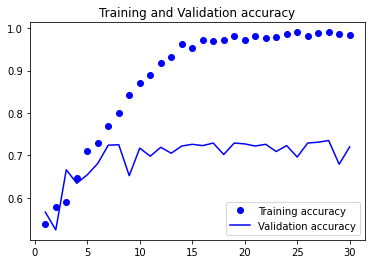

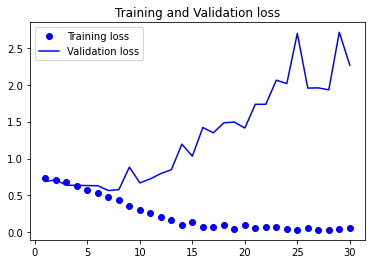

In [ ]:
# 시각화
import matplotlib.pyplot as plt

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs=range(1, len(accuracy)+1)

plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and Validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and Validation loss")
plt.legend()
plt.show()

epoch 을 하는 이유 : 반복학습을 하여 성능을 개선하기 위해

In [ ]:
# 콜백으로 저장한 모델 로드
import numpy as np
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print('테스트 정확도', np.round(test_acc, 3))

63/63 [==============================] - 3s 39ms/step - loss: 0.5778 - accuracy: 0.7165
테스트 정확도 0.716


### (2) 데이터 증식

In [ ]:
# 데이터 증식 정의하기
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

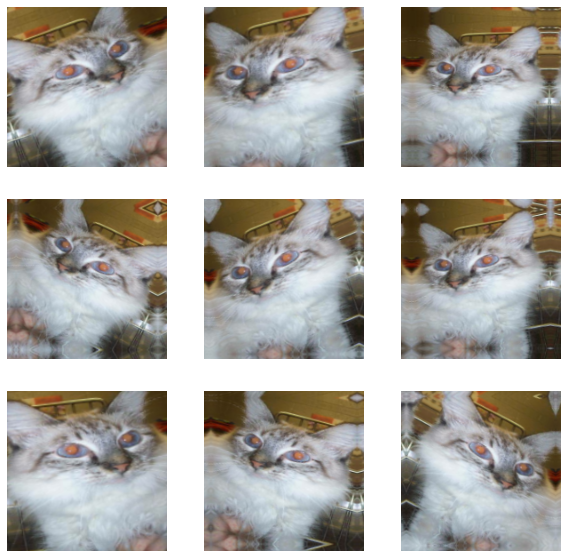

In [ ]:
# 랜덤하게 증식된 훈련 이미지 출력
plt.figure(figsize=(10,10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(augmented_images[0].numpy().astype('uint8'))
        plt.axis("off")

In [ ]:
# 이미지 증식과 드롭아웃을 포함한 컨브넷 만들기
inputs = keras.Input(shape=(180,180,3))

x = data_augmentation(inputs)   # 이미지 증식
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)     # 드롭아웃

outputs = layers.Dense(units=1, activation='sigmoid')(x)

model = keras.Model(inputs, outputs)

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics='accuracy')

In [ ]:
# 규제를 추가한 컨브넷 훈련하기 
callbacks = [
    keras.callbacks.ModelCheckpoint(             # ModelCheckpoint : 에포크가 끝날 때마다 모델 저장
        filepath="convnet_from_scratch_with_augmentation.keras",   # 파일 저장 경로
        save_best_only=True,                     # val_loss 값이 이전보다 더 낮을 때만 저장
        monitor='val_loss')
]

history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks
)

Epoch 1/100
63/63 [==============================] - 5s 71ms/step - loss: 0.0658 - accuracy: 0.9870 - val_loss: 7.5672 - val_accuracy: 0.7580
Epoch 2/100
63/63 [==============================] - 5s 71ms/step - loss: 0.0994 - accuracy: 0.9865 - val_loss: 5.7748 - val_accuracy: 0.7420
Epoch 3/100
63/63 [==============================] - 5s 70ms/step - loss: 0.1081 - accuracy: 0.9890 - val_loss: 6.2977 - val_accuracy: 0.7560
Epoch 4/100
63/63 [==============================] - 5s 72ms/step - loss: 0.0821 - accuracy: 0.9920 - val_loss: 5.3926 - val_accuracy: 0.7450
Epoch 5/100
63/63 [==============================] - 5s 71ms/step - loss: 0.0880 - accuracy: 0.9865 - val_loss: 6.1721 - val_accuracy: 0.7520
Epoch 6/100
63/63 [==============================] - 5s 69ms/step - loss: 0.0531 - accuracy: 0.9930 - val_loss: 6.4887 - val_accuracy: 0.7360
Epoch 7/100
63/63 [==============================] - 5s 70ms/step - loss: 0.1918 - accuracy: 0.9855 - val_loss: 5.4118 - val_accuracy: 0.7580
Epoch 

In [ ]:
# 테스트 세트에서 모델 훈련하기
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras"
    )
test_loss, test_acc = test_model.evaluate(test_dataset)
print('테스트 정확도', np.round(test_acc, 3))

63/63 [==============================] - 3s 36ms/step - loss: 5.1305 - accuracy: 0.7365
테스트 정확도 0.737


### (3) 사전 훈련된 모델 활용

In [ ]:
# VGG16 합성곱 기반 층 만들기
conv_base = keras.applications.vgg16.VGG16(
    weights='imagenet',
    include_top=False,    # Dense 층 연결안함 (Conv층만 사용)
    input_shape=(180,180,3)
)

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

#### ① 데이터 증식을 사용하지 않는 빠른 특성 추출

In [ ]:
# VGG16 특성과 해당 레이블 추출하기
import numpy as np

def get_features_and_labels(dataset):
    all_features=[]
    all_labels=[]
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)

    return np.concatenate(all_features), np.concatenate(all_labels)

In [ ]:
train_features, train_labels = get_features_and_labels(train_dataset)
val_features, val_labels = get_features_and_labels(validation_dataset)
test_features, test_labels = get_features_and_labels(test_dataset)

In [ ]:
train_features.shape

(2000, 5, 5, 512)

In [ ]:
# 밀집 연결 분류기 정의하고 훈련하기
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(units=1, activation='sigmoid')(x)

model = keras.Model(inputs, outputs)

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics='accuracy')

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction.keras",
        save_best_only=True,
        monitor="var_loss"
    )
]

history = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks
)

Epoch 1/20
57/63 [==========================>...] - ETA: 0s - loss: 15.5278 - accuracy: 0.9315

63/63 [==============================] - 1s 8ms/step - loss: 16.3494 - accuracy: 0.9290 - val_loss: 6.0585 - val_accuracy: 0.9660
Epoch 2/20
60/63 [===========================>..] - ETA: 0s - loss: 4.0344 - accuracy: 0.9766

63/63 [==============================] - 0s 7ms/step - loss: 3.9368 - accuracy: 0.9770 - val_loss: 4.9964 - val_accuracy: 0.9700
Epoch 3/20
56/63 [=========================>....] - ETA: 0s - loss: 1.8246 - accuracy: 0.9866

63/63 [==============================] - 0s 6ms/step - loss: 1.8261 - accuracy: 0.9870 - val_loss: 4.6733 - val_accuracy: 0.9700
Epoch 4/20
61/63 [============================>.] - ETA: 0s - loss: 1.3456 - accuracy: 0.9898

63/63 [==============================] - 0s 7ms/step - loss: 1.3133 - accuracy: 0.9900 - val_loss: 4.4649 - val_accuracy: 0.9760
Epoch 5/20
60/63 [===========================>..] - ETA: 0s - loss: 1.4463 - accuracy: 0.9911

63/63 [==============================] - 0s 7ms/step - loss: 1.3885 - accuracy: 0.9915 - val_loss: 5.2365 - val_accuracy: 0.9750
Epoch 6/20
61/63 [============================>.] - ETA: 0s - loss: 0.5389 - accuracy: 0.9928

63/63 [==============================] - 0s 6ms/step - loss: 0.5260 - accuracy: 0.9930 - val_loss: 8.8198 - val_accuracy: 0.9630
Epoch 7/20
61/63 [============================>.] - ETA: 0s - loss: 0.7884 - accuracy: 0.9933

63/63 [==============================] - 0s 6ms/step - loss: 0.7695 - accuracy: 0.9935 - val_loss: 5.6312 - val_accuracy: 0.9760
Epoch 8/20
59/63 [===========================>..] - ETA: 0s - loss: 0.6552 - accuracy: 0.9952

63/63 [==============================] - 0s 7ms/step - loss: 0.6185 - accuracy: 0.9955 - val_loss: 5.3518 - val_accuracy: 0.9760
Epoch 9/20
63/63 [==============================] - ETA: 0s - loss: 0.4315 - accuracy: 0.9950

63/63 [==============================] - 0s 7ms/step - loss: 0.4315 - accuracy: 0.9950 - val_loss: 5.1968 - val_accuracy: 0.9790
Epoch 10/20
61/63 [============================>.] - ETA: 0s - loss: 0.6631 - accuracy: 0.9964

63/63 [==============================] - 0s 6ms/step - loss: 0.6472 - accuracy: 0.9965 - val_loss: 6.6075 - val_accuracy: 0.9750
Epoch 11/20
59/63 [===========================>..] - ETA: 0s - loss: 0.2005 - accuracy: 0.9974

63/63 [==============================] - 0s 7ms/step - loss: 0.1893 - accuracy: 0.9975 - val_loss: 5.7483 - val_accuracy: 0.9780
Epoch 12/20
59/63 [===========================>..] - ETA: 0s - loss: 0.1595 - accuracy: 0.9979

63/63 [==============================] - 0s 6ms/step - loss: 0.1506 - accuracy: 0.9980 - val_loss: 5.8803 - val_accuracy: 0.9780
Epoch 13/20
58/63 [==========================>...] - ETA: 0s - loss: 0.2479 - accuracy: 0.9957

63/63 [==============================] - 0s 7ms/step - loss: 0.2301 - accuracy: 0.9960 - val_loss: 6.2228 - val_accuracy: 0.9750
Epoch 14/20
62/63 [============================>.] - ETA: 0s - loss: 0.2542 - accuracy: 0.9970

63/63 [==============================] - 0s 6ms/step - loss: 0.2522 - accuracy: 0.9970 - val_loss: 6.8880 - val_accuracy: 0.9710
Epoch 15/20
62/63 [============================>.] - ETA: 0s - loss: 0.2249 - accuracy: 0.9980

63/63 [==============================] - 0s 7ms/step - loss: 0.2231 - accuracy: 0.9980 - val_loss: 5.7644 - val_accuracy: 0.9800
Epoch 16/20
58/63 [==========================>...] - ETA: 0s - loss: 0.1809 - accuracy: 0.9978

63/63 [==============================] - 0s 7ms/step - loss: 0.1679 - accuracy: 0.9980 - val_loss: 5.8917 - val_accuracy: 0.9780
Epoch 17/20
58/63 [==========================>...] - ETA: 0s - loss: 6.2676e-11 - accuracy: 1.0000

63/63 [==============================] - 0s 7ms/step - loss: 5.8163e-11 - accuracy: 1.0000 - val_loss: 5.8844 - val_accuracy: 0.9780
Epoch 18/20
58/63 [==========================>...] - ETA: 0s - loss: 0.0479 - accuracy: 0.9995    

63/63 [==============================] - 0s 7ms/step - loss: 0.0444 - accuracy: 0.9995 - val_loss: 9.0607 - val_accuracy: 0.9630
Epoch 19/20
58/63 [==========================>...] - ETA: 0s - loss: 0.2150 - accuracy: 0.9984

63/63 [==============================] - 0s 6ms/step - loss: 0.1995 - accuracy: 0.9985 - val_loss: 6.1592 - val_accuracy: 0.9810
Epoch 20/20
59/63 [===========================>..] - ETA: 0s - loss: 0.1004 - accuracy: 0.9984

63/63 [==============================] - 0s 6ms/step - loss: 0.0947 - accuracy: 0.9985 - val_loss: 6.4061 - val_accuracy: 0.9790


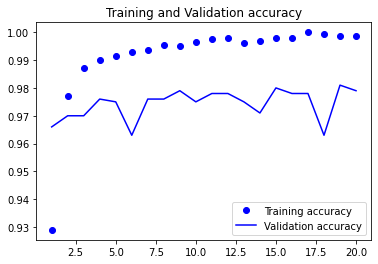

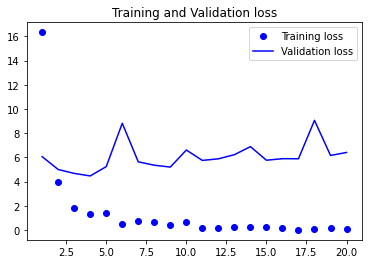

In [ ]:
# 결과를 그래프로 나타내기
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs=range(1, len(acc)+1)

plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and Validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and Validation loss")
plt.legend()
plt.show()

In [ ]:
# 테스트 세트에서 모델 훈련하기
test_model = keras.models.load_model("feature_extraction.keras")
test_loss, test_acc = test_model.evaluate(test_features, test_labels)
print('테스트 정확도', np.round(test_acc, 3))

OSError: ignored

#### ② (과제) 데이터 증식을 사용한 특성 추출

In [ ]:
## VGG16 합성곱 기반 층을 만들고 동결하기
conv_base = keras.applications.vgg16.VGG16(
    weights='imagenet',
    include_top=False
)

conv_base.trainable = False    # 층이나 모델의 훈련 가능한 가중치 리스트 동결(텅 빈상태)


## 데이터 증식 단계와 밀집 분류기를 합성곱 기반 층에 추가하기
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180,180,3))

x = data_augmentation(inputs)   # 이미지 증식
x = keras.applications.vgg16.preprocess_input(x)   # 입력값의 스케일 조정
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(units=256)
x = layers.Dropout(0.5)(x)     # 드롭아웃

outputs = layers.Dense(units=1, activation='sigmoid')(x)

model = keras.Model(inputs, outputs)

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics='accurcay')


## 모델 컴파일 및 훈련
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="var_loss"
    )
]

history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks
)


## 테스트 세트에서 모델 평가
test_model = keras.models.load_model(
    "feature_extraction_with_data_augmentation.keras"
)
test_loss, test_acc = test_model.evaluate(test_dataset)
print('테스트 정확도', np.round(test_acc, 3))

#### ③ 사전 훈련된 모델 미세조정

In [ ]:
# 마지막에서 네번째 층까지 모든 층 동결
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
  layer.trainable = False    # 가중치 업데이트 안함 (동결)

In [ ]:
# 모델 미세 조정하기
model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),  # 1e-5 = 0.00001
              metrics='accuracy')

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor='val_loss'
    )
]

history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks
)

In [ ]:
# 테스트 데이터 세트에서 모델 평가
model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f'테스트 정확도: {test_acc:.3f}')

## < CNN 모델의 발전 >

* 1998: LeNet – Gradient-based Learning Applied to Document Recognition
* 2012: AlexNet – ImageNet Classification with Deep Convolutional Neural Network
* **2014: VggNet – Very Deep Convolutional Networks for Large-Scale Image Recognition**
* **2014: GooLeNet – Going Deeper with Convolutions** (= inception)
* 2014: SppNet – Spatial Pyramid Pooling in Deep Convolutional Networks for Visual Recognition
* **2015: ResNet – Deep Residual Learning for Image Recognition**
* **2016: Xception – Xception: Deep Learning with Depthwise Separable Convolutions**
* **2017: MobileNet – MobileNets: Efficient Convolutional Neural Networks for Mobile Vision Application**
* **2017: DenseNet – Densely Connected Convolutional Networks**
* 2017: SeNet – Squeeze and Excitation Networks
* 2017: ShuffleNet – ShuffleNet: An Extremely Efficient Convolutional Neural Network for Mobile Devices
* **2018: NasNet – Learning Transferable Architectures for Scalable Image Recognition**
* 2018: Bag of Tricks – Bag of Tricks for Image Classification with Convolutional Neural Networks
* **2019: EfficientNet – EfficientNet: Rethinking Model Scaling for Convolutional Neural Networks**


### * VGG19

In [ ]:
# VGG19 합성곱 기반 층을 만들고 동결
from keras.applications.vgg19 import VGG19, preprocess_input, decode_predictions

vggnet = VGG19(include_top=True, weights='imagenet',
               input_tensor=None, input_shape=None,
               pooling=None, classes=1000               
               )

vggnet.summary()

574710816/574710816 [==============================] - 25s 0us/step
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                           

In [ ]:
!wget -O dog.jpg https://www.publicdomainpictures.net/pictures/250000/nahled/dog-beagle-portrait.jpg     #(224, 224)

--2022-12-12 06:36:09--  https://www.publicdomainpictures.net/pictures/250000/nahled/dog-beagle-portrait.jpg
Resolving www.publicdomainpictures.net (www.publicdomainpictures.net)... 104.20.44.162, 172.67.2.204, 104.20.45.162, ...
Connecting to www.publicdomainpictures.net (www.publicdomainpictures.net)|104.20.44.162|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 88498 (86K) [image/jpeg]
Saving to: ‘dog.jpg’

dog.jpg             100%[===================>]  86.42K  --.-KB/s    in 0.002s  

2022-12-12 06:36:09 (40.1 MB/s) - ‘dog.jpg’ saved [88498/88498]



35363/35363 [==============================] - 0s 0us/step
[[('n02088364', 'beagle', 0.8393818), ('n02089973', 'English_foxhound', 0.0883476), ('n02089867', 'Walker_hound', 0.062388174), ('n02088238', 'basset', 0.0045650755), ('n02088632', 'bluetick', 0.003339454)]]


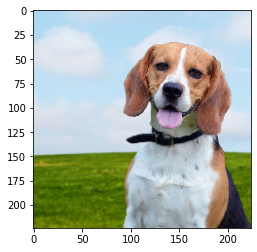

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

img = tf.keras.preprocessing.image.load_img('dog.jpg', target_size=(224, 224))
plt.imshow(img)

x = tf.keras.preprocessing.image.img_to_array(img)
x = x.reshape(1, x.shape[0], x.shape[1], x.shape[2])
x = preprocess_input(x)

preds = vggnet.predict(x)
print(decode_predictions(preds))

### * Inception

In [ ]:
# GoogLeNet, Inception
from keras.applications.inception_v3 import InceptionV3, preprocess_input, decode_predictions

inception = InceptionV3(include_top=True, weights='imagenet',
                        input_tensor=None, input_shape=None,
                        pooling=None, classes=1000)

inception.summary()

96112376/96112376 [==============================] - 5s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)           

In [ ]:
!wget -O fish.jpg https://upload.wikimedia.org/wikipedia/commons/7/7a/Goldfish_1.jpg    # (299,299)

--2022-12-12 06:42:34--  https://upload.wikimedia.org/wikipedia/commons/7/7a/Goldfish_1.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 103.102.166.240, 2001:df2:e500:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|103.102.166.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4648040 (4.4M) [image/jpeg]
Saving to: ‘fish.jpg’

fish.jpg            100%[===================>]   4.43M  29.0MB/s    in 0.2s    

2022-12-12 06:42:34 (29.0 MB/s) - ‘fish.jpg’ saved [4648040/4648040]



1/1 [==============================] - 2s 2s/step
[[('n01443537', 'goldfish', 0.9748303), ('n02701002', 'ambulance', 0.0023265795), ('n02606052', 'rock_beauty', 0.0019084793), ('n02607072', 'anemone_fish', 0.00066402595), ('n09256479', 'coral_reef', 0.0004321773)]]


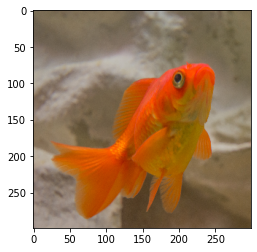

In [ ]:
img = tf.keras.preprocessing.image.load_img('fish.jpg', target_size=(299,299))
plt.imshow(img)

x = tf.keras.preprocessing.image.img_to_array(img)
x = x.reshape(1, x.shape[0], x.shape[1], x.shape[2])
x = preprocess_input(x)

preds = inception.predict(x)
print(decode_predictions(preds))

1/1 [==============================] - 0s 24ms/step
[[('n03788365', 'mosquito_net', 0.072009094), ('n01498041', 'stingray', 0.029418105), ('n15075141', 'toilet_tissue', 0.022298891), ('n04209239', 'shower_curtain', 0.018269923), ('n01737021', 'water_snake', 0.016520776)]]


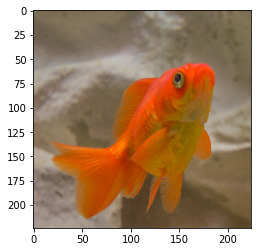

In [ ]:
# 금붕어 사진에 vggnet 적용
img = tf.keras.preprocessing.image.load_img('fish.jpg', target_size=(224,224))
plt.imshow(img)

x = tf.keras.preprocessing.image.img_to_array(img)
x = x.reshape(1, x.shape[0], x.shape[1], x.shape[2])
x = preprocess_input(x)

preds = vggnet.predict(x)
print(decode_predictions(preds))

### * Resnet

In [ ]:
from keras.applications.resnet import ResNet50, preprocess_input, decode_predictions

resnet = ResNet50(include_top=True, weights='imagenet',
                  input_tensor=None, input_shape=None,
                  pooling=None, classes=1000)

resnet.summary()

102967424/102967424 [==============================] - 5s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                        

In [ ]:
!wget -O bee.jpg https://upload.wikimedia.org/wikipedia/commons/4/4d/Apis_mellifera_Western_honey_bee.jpg    # (224, 224)

--2022-12-12 06:43:28--  https://upload.wikimedia.org/wikipedia/commons/4/4d/Apis_mellifera_Western_honey_bee.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 103.102.166.240, 2001:df2:e500:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|103.102.166.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2421052 (2.3M) [image/jpeg]
Saving to: ‘bee.jpg’

bee.jpg             100%[===================>]   2.31M  --.-KB/s    in 0.08s   

2022-12-12 06:43:28 (29.2 MB/s) - ‘bee.jpg’ saved [2421052/2421052]



1/1 [==============================] - 1s 1s/step
[[('n02206856', 'bee', 0.9990995), ('n03530642', 'honeycomb', 0.0005614693), ('n02190166', 'fly', 0.00014320065), ('n02727426', 'apiary', 0.00010164107), ('n02219486', 'ant', 5.7395835e-05)]]


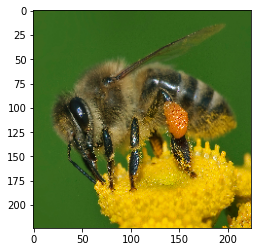

In [ ]:
img = tf.keras.preprocessing.image.load_img('bee.jpg', target_size=(224,224))
plt.imshow(img)

x = tf.keras.preprocessing.image.img_to_array(img)
x = x.reshape(1, x.shape[0], x.shape[1], x.shape[2])
x = preprocess_input(x)

preds = resnet.predict(x)
print(decode_predictions(preds))

### * Xception
- Inception module 을 이용하여 depthwise convolution 적용

In [ ]:
from keras.applications.xception import Xception, preprocess_input, decode_predictions

xception = Xception(include_top=True, weights='imagenet',
                    input_tensor=None, input_shape=None,
                    pooling=None, classes=1000)

xception.summary()

91884032/91884032 [==============================] - 5s 0us/step
Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 149, 149, 32  864         ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 149, 149, 32  128        ['block1_conv1[0][0]']           
 ation)                   

In [ ]:
!wget -O Beaver.jpg https://upload.wikimedia.org/wikipedia/commons/6/6b/American_Beaver.jpg    # (299,299)

--2022-12-12 06:44:05--  https://upload.wikimedia.org/wikipedia/commons/6/6b/American_Beaver.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 103.102.166.240, 2001:df2:e500:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|103.102.166.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 186747 (182K) [image/jpeg]
Saving to: ‘Beaver.jpg’

Beaver.jpg          100%[===================>] 182.37K  --.-KB/s    in 0.006s  

2022-12-12 06:44:05 (31.8 MB/s) - ‘Beaver.jpg’ saved [186747/186747]



1/1 [==============================] - 1s 921ms/step
[[('n02363005', 'beaver', 0.82783943), ('n02361337', 'marmot', 0.059819862), ('n02493509', 'titi', 0.004426797), ('n02442845', 'mink', 0.0024072072), ('n01883070', 'wombat', 0.001986879)]]


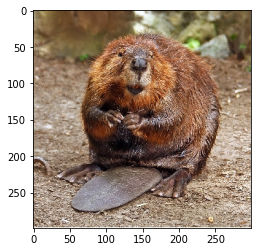

In [ ]:
img = tf.keras.preprocessing.image.load_img('Beaver.jpg', target_size=(299,299))
plt.imshow(img)

x = tf.keras.preprocessing.image.img_to_array(img)
x = x.reshape(1, x.shape[0], x.shape[1], x.shape[2])
x = preprocess_input(x)

preds = xception.predict(x)
print(decode_predictions(preds))

### * MobileNet
* 성능보다 모델의 크기 또는 연산 속도 감소
* Depthwise conv 와 Pointwise conv 사이에도 batch normalization (배치 정규화 - 데이터의 스케일 차이 최소화) 과 ReLU 를 삽입
* Conv layer 를 활용한 모델과 정확도는 비슷하면서 계산량은 9배, 파라미터 수는 7배 줄임

In [ ]:
from keras.applications.mobilenet import MobileNet, preprocess_input, decode_predictions

mobilenet = MobileNet(include_top=True, weights='imagenet',
                      input_tensor=None, input_shape=None,
                      pooling=None, classes=1000)

mobilenet.summary()

17225924/17225924 [==============================] - 2s 0us/step
Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32

In [ ]:
!wget -O crane.jpg https://p1.pxfuel.com/preview/42/50/534/europe-channel-crane-harbour-crane-harbour-cranes-cranes-transport.jpg    # (224,224)

--2022-12-12 06:44:56--  https://p1.pxfuel.com/preview/42/50/534/europe-channel-crane-harbour-crane-harbour-cranes-cranes-transport.jpg
Resolving p1.pxfuel.com (p1.pxfuel.com)... 104.21.71.48, 172.67.169.122, 2606:4700:3035::6815:4730, ...
Connecting to p1.pxfuel.com (p1.pxfuel.com)|104.21.71.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 86911 (85K) [image/jpeg]
Saving to: ‘crane.jpg’

crane.jpg           100%[===================>]  84.87K  --.-KB/s    in 0.003s  

2022-12-12 06:44:57 (27.2 MB/s) - ‘crane.jpg’ saved [86911/86911]



1/1 [==============================] - 1s 669ms/step
[[('n03126707', 'crane', 0.96001226), ('n03216828', 'dock', 0.029438462), ('n03240683', 'drilling_platform', 0.0051290323), ('n03344393', 'fireboat', 0.0026267457), ('n04366367', 'suspension_bridge', 0.00050067576)]]


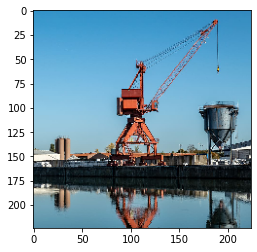

In [ ]:
img = tf.keras.preprocessing.image.load_img('crane.jpg', target_size=(224,224))
plt.imshow(img)

x = tf.keras.preprocessing.image.img_to_array(img)
x = x.reshape(1, x.shape[0], x.shape[1], x.shape[2])
x = preprocess_input(x)

preds = mobilenet.predict(x)
print(decode_predictions(preds))

### * DenseNet

* 각 층은 모든 앞 단계에서 올 수 있는 지름질 연결 구성
* 특징지도의 크기를 줄이기 위해 풀링 연산 적용 필요
* 밀집 블록(dense block)과 전이층(transition layer)으로 구성 
* 전이층 : 1x1 컨볼루션과 평균값 풀링(APool)으로 구성   

<img src="https://oi.readthedocs.io/en/latest/_images/cnn_vs_resnet_vs_densenet.png" width="700">


In [ ]:
from keras.applications.densenet import DenseNet201, preprocess_input, decode_predictions

densenet = DenseNet201(include_top=True, weights='imagenet',
                       input_tensor=None, input_shape=None,
                       pooling=None, classes=1000)

densenet.summary()

82524592/82524592 [==============================] - 5s 0us/step
Model: "densenet201"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_6[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                       

In [ ]:
!wget -O Zebra.jpg https://upload.wikimedia.org/wikipedia/commons/f/f0/Zebra_standing_alone_crop.jpg    # (224,224)

--2022-12-12 06:47:16--  https://upload.wikimedia.org/wikipedia/commons/f/f0/Zebra_standing_alone_crop.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 103.102.166.240, 2001:df2:e500:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|103.102.166.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 188036 (184K) [image/jpeg]
Saving to: ‘Zebra.jpg’

Zebra.jpg           100%[===================>] 183.63K  --.-KB/s    in 0.006s  

2022-12-12 06:47:16 (32.1 MB/s) - ‘Zebra.jpg’ saved [188036/188036]



1/1 [==============================] - 4s 4s/step
[[('n02391049', 'zebra', 0.93139106), ('n01518878', 'ostrich', 0.019752892), ('n02423022', 'gazelle', 0.011579063), ('n02397096', 'warthog', 0.0046250196), ('n02422106', 'hartebeest', 0.0031486712)]]


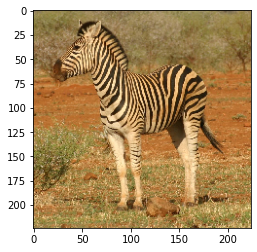

In [ ]:
img = tf.keras.preprocessing.image.load_img('Zebra.jpg', target_size=(224,224))
plt.imshow(img)

x = tf.keras.preprocessing.image.img_to_array(img)
x = x.reshape(1, x.shape[0], x.shape[1], x.shape[2])
x = preprocess_input(x)

preds = densenet.predict(x)
print(decode_predictions(preds))

### *과제
6개 이미지에 대해서 6개 사전학습모델을 이용해 가장 성능이 좋은 경우 3개와 안좋은 경우 1개를 찾기

In [ ]:
import tensorflow as tf
from keras import applications
from keras.applications.vgg19 import VGG19, preprocess_input, decode_predictions
from keras.applications.inception_v3 import InceptionV3, preprocess_input, decode_predictions
from keras.applications.resnet import ResNet50, preprocess_input, decode_predictions
from keras.applications.xception import Xception, preprocess_input, decode_predictions
from keras.applications.mobilenet import MobileNet, preprocess_input, decode_predictions
from keras.applications.densenet import DenseNet201, preprocess_input, decode_predictions


!wget -O dog.jpg https://www.publicdomainpictures.net/pictures/250000/nahled/dog-beagle-portrait.jpg   #(224, 224)
!wget -O fish.jpg https://upload.wikimedia.org/wikipedia/commons/7/7a/Goldfish_1.jpg    # (299,299)
!wget -O bee.jpg https://upload.wikimedia.org/wikipedia/commons/4/4d/Apis_mellifera_Western_honey_bee.jpg   # (224, 224)
!wget -O Beaver.jpg https://upload.wikimedia.org/wikipedia/commons/6/6b/American_Beaver.jpg    # (299,299)
!wget -O crane.jpg https://p1.pxfuel.com/preview/42/50/534/europe-channel-crane-harbour-crane-harbour-cranes-cranes-transport.jpg    # (224,224)
!wget -O Zebra.jpg https://upload.wikimedia.org/wikipedia/commons/f/f0/Zebra_standing_alone_crop.jpg    # (224,224)

'''
img_dog = tf.keras.preprocessing.image.load_img('dog.jpg', target_size=(224,224))
img_fish = tf.keras.preprocessing.image.load_img('fish.jpg', target_size=(299,299))
img_bee = tf.keras.preprocessing.image.load_img('bee.jpg', target_size=(224,224))
img_Beaver = tf.keras.preprocessing.image.load_img('Beaver.jpg', target_size=(299,299))
img_crane = tf.keras.preprocessing.image.load_img('crane.jpg', target_size=(224,224))
img_Zebra = tf.keras.preprocessing.image.load_img('Zebra.jpg', target_size=(224,224))
#plt.imshow(img)
'''

In [ ]:
#applications_list = [VGG19, InceptionV3, ResNet50, Xception, MobileNet, DenseNet201]
#applications_name_list = ['vgg19', 'inception', 'resnet', 'xception', 'mobilenet', 'densenet']

applications_list = [VGG19, InceptionV3, ResNet50, Xception, MobileNet, DenseNet201]
img_list = ['dog.jpg', 'fish.jpg', 'bee.jpg', 'Beaver.jpg', 'crane.jpg', 'Zebra.jpg']

for application in applications_list:
  app = application(include_top=True, weights='imagenet')

  for img in img_list:
    print(img)
    img_name = tf.keras.preprocessing.image.load_img(img, target_size=(app.input_shape[1], app.input_shape[2]))
    
    x = tf.keras.preprocessing.image.img_to_array(img_name)
    x = x.reshape(1, x.shape[0], x.shape[1], x.shape[2])
    x = preprocess_input(x)
    preds = app.predict(x)
    
    print(app.name, ':', decode_predictions(preds))
  
  print()

dog.jpg
1/1 [==============================] - 1s 922ms/step
vgg19 : [[('n02092339', 'Weimaraner', 0.07482895), ('n03788365', 'mosquito_net', 0.07184809), ('n02099849', 'Chesapeake_Bay_retriever', 0.03282235), ('n02088364', 'beagle', 0.025468655), ('n02091032', 'Italian_greyhound', 0.020114018)]]
fish.jpg
1/1 [==============================] - 1s 719ms/step
vgg19 : [[('n01498041', 'stingray', 0.056692097), ('n03788365', 'mosquito_net', 0.05369297), ('n01632777', 'axolotl', 0.032718115), ('n01819313', 'sulphur-crested_cockatoo', 0.028753059), ('n01737021', 'water_snake', 0.023061797)]]
bee.jpg
1/1 [==============================] - 1s 745ms/step
vgg19 : [[('n03788365', 'mosquito_net', 0.039348274), ('n01737021', 'water_snake', 0.03097035), ('n02233338', 'cockroach', 0.021868993), ('n04209239', 'shower_curtain', 0.021713132), ('n01498041', 'stingray', 0.018311843)]]
Beaver.jpg
1/1 [==============================] - 1s 746ms/step
vgg19 : [[('n02137549', 'mongoose', 0.04260198), ('n0149804

#### 예측이 잘 된 것 : xception, mobilenet, densenet
*  inception_v3\
'beagle', 0.76318175 / 'goldfish', 0.9670775 / 'bee', 0.36397147\
'beaver', 0.9195787 / 'crane', 0.75914276 / 'zebra', 0.96399885

* xception\
'beagle', 0.91743034 / 'goldfish', 0.9421093 / 'bee', 0.8499208\
'beaver', 0.880879 / 'crane', 0.72643167 / 'zebra', 0.9527384

* mobilenet\
'beagle', 0.83070576 / 'goldfish', 0.9938147 / 'bee', 0.999506\
'beaver', 0.9618741 / 'crane', 0.9925022 / 'zebra', 0.999253

* densenet\
'beagle', 0.7283825 / 'goldfish', 0.99981636 / 'bee', 0.977011\
'beaver', 0.97685975 / 'crane', 0.98856735 / 'zebra', 0.93139124

#### 예측이 잘 되지 못한 것 : resnet50
* vgg19\
'Weimaraner', 0.07482895 / 'stingray', 0.056692097 / 'mosquito_net', 0.039348274\
'mongoose', 0.04260198 / 'mosquito_net', 0.08971667 / 'bustard', 0.037189994

* resnet50\
'envelope', 0.05050873 / 'nematode', 0.1738911 / 'dishwasher', 0.047634702\
'screw', 0.031908583 / 'submarine', 0.31993225 / 'screw', 0.07552517

# 221213 Day76

## 1. 텍스트 토큰화

### (1) 원-핫 인코딩

In [ ]:
# 넘파이를 이용한 원-핫 인코딩
import numpy as np

samples = ['The cat sat on the mat.', 'The dog ate my homework.']

token_index = {}
for sample in samples:
  for word in sample.split():
    if word not in token_index:
      token_index[word] = len(token_index) + 1   # '+1' 인덱스는 0을 사용하지 않으므로

max_length = 10   # 각 샘플에서 최대로 사용할 수 있는 단어의 수

# 결과를 저장할 배열 : 3차원 (2, 10, 11) 형태
results = np.zeros((len(samples), max_length, max(token_index.values()) + 1))

for i, sample in enumerate(samples):
  for j, word in list(enumerate(sample.split()))[:max_length]:
    index = token_index.get(word)
    results[i, j, index] = 1.

results

array([[[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0

In [ ]:
# samples = ['The cat sat on the mat.', 'The dog ate my homework.']
token_index

{'The': 1,
 'cat': 2,
 'sat': 3,
 'on': 4,
 'the': 5,
 'mat.': 6,
 'dog': 7,
 'ate': 8,
 'my': 9,
 'homework.': 10}

In [ ]:
# 케라스를 이용한 원-핫 인코딩 (텍스트 토큰화)
from keras.preprocessing.text import Tokenizer

samples = ['The cat sat on the mat.', 'The dog ate my homework.']

tokenizer = Tokenizer(num_words=1000)   # 가장 빈도가 높은 1000개의 단어만 선택하는 Tokenizer 객체
tokenizer.fit_on_texts(samples)    # 단어 인덱스 구축

sequences = tokenizer.texts_to_sequences(samples)   # 문자열을 (순서가 있는)정수 인덱스의 리스트로 변환

ohe_results = tokenizer.texts_to_matrix(samples, mode='binary')   # 텍스트를 matrix 의 형태로 변환

word_index = tokenizer.word_index

print('Found  %s unique tokens.' % len(word_index))

Found  9 unique tokens.


#### * 시퀀스 모델 (sequence model)
텍스트는 '단어의 순서' 가 중요하다\
순서 기반의 특성을 수동으로 만드는 대신, 원시 단어 시퀀스를 모델에 전달하여 스스로 특성을 학습하도록 하는 것, 이것이 '시퀀스 모델' 이다

시퀀스 모델을 구현하려면 먼저 입력 샘플을 '정수 인덱스의 시퀀스' 로 표현해야한다\
(즉 하나의 정수가 하나의 단어를 나타낸다)\
--> texts_to_sequences()

그 다음 각 정수를 벡터로 매핑하여 벡터 시퀀스를 얻는다 (원-핫 인코딩)\
--> texts_to_matrix(mode='binary')

In [ ]:
print(word_index)

{'the': 1, 'cat': 2, 'sat': 3, 'on': 4, 'mat': 5, 'dog': 6, 'ate': 7, 'my': 8, 'homework': 9}


In [ ]:
sequences

[[1, 2, 3, 4, 1, 5], [1, 6, 7, 8, 9]]

In [ ]:
ohe_results[0,:10]

array([0., 1., 1., 1., 1., 1., 0., 0., 0., 0.])

### (2) Embedding
원-핫 인코딩은 데이터의 양이 많은 경우 좋지 않은 성능이 나온다\
보다 더 나은 방법이 '단어 임베딩 (word embedding)' 이다

단어는 구조적인 공간을 형성한다 즉 단어에 '공유되는 정보' 가 있다

'movie' 와 'film' 같은 대부분의 문장에서 동일한 의미로 사용되는 두 단어 벡터의 '의미 거리(두 벡터 사이의 기하학적 거리)'는 동일하거나 매우 가까워야 한다\
즉 서로 다른 의미를 가지는 단어는 서로 멀리 떨어져 있고 관련이 있는 단어는 가까이 놓여있어야 한다는 것이다

'단어 임베딩' 은 정확히 이를 위한 단어의 벡터 표현이다\
사람의 언어를 구조적인 기하학적 공간에 매핑한다

### * 단어 임베딩 이해하기
- 단어와 벡터를 연관짓는 또 다른 방법은 '단어 임베딩' 이라는 '밀집 단어 벡터' 를 사용하는 것이다

- '원-핫 인코딩' 으로 만든 벡터는 희소하고 (대부분 0으로 채워짐) 고차원이다\
(어휘 사전에 있는 단어의 수와 차원이 같다)

- 반면 '단어 임베딩' 은 저차원의 실수형 벡터이다 (희소 벡터의 반대인 밀집 벡터)

- 원-핫 인코딩으로 얻은 단어 벡터와 달리, '단어 임베딩' 은 '데이터로부터 학습' 된다\
 - (보통 256차원, 512차원 또는 큰 어휘 사전을 다룰 때는 1,024차원의 단어 임베딩을 사용한다)

- 반면 원-핫 인코딩은 (20,000개의 토큰으로 이루어진 어휘 사전을 만들려면) 20,000차원 또는 그 이상의 벡터일 경우가 많으므로, 단어 임베딩이 더 많은 정보를 적은 차원에 저장할 수 있다

* 단어 임베딩을 만드는 방법
 - (문서 분류나 감성 예측과 같은) 관심 대상인 문제와 함께 단어 임베딩을 학습하며, 이런 경우에는 '랜덤한 단어 벡터' 로 시작해서 신경망의 가중치를 학습하는 것과 같은 방식으로 단어 벡터를 학습한다

 - 현재 풀어야할 문제와는 다른 머신 러닝 작업에서 '미리 계산된' 단어 임베딩을 로드하며 이를 '사전 훈련된 단어 임베딩' 이라고 한다

### * Embedding 층으로 단어 임베딩 학습하기
- 실제 단어 임베딩 공간에서 의미 있는 기하학적 변환의 일반적인 예는 '성별' 벡터와 '복수(plural)' 벡터 이다
 - 예를 들어 'king' 벡터에 'female' 벡터를 더하면 'queen' 벡터가 되고, 'plural' 벡터를 더하면 'kings' 가 된다
 - (데이터의 알고리즘 학습은 일종의 '연산과정' 이다)

- 단어 임베딩 공간은 전형적으로 이런 해석 가능하고 잠재적으로 유용한 수천 개의 벡터를 특성으로 가진다

- 사람의 언어를 완벽하게 매핑해서 어떤 자연어 처리 작업에도 사용할 수 있는 이상적인 단어 임베딩 공간은 아직 가능하지 않다 (사람의 언어에도 그런 것은 없다)

- 실제로 좋은 단어 임베딩 공간을 만드는 것은 문제에 따라 크게 달라진다
 - 영어로 된 영화 리뷰 감성 분석 모델을 위한 완벽한 단어 임베딩 공간은, 영어로 된 법률 문서 분류 모델을 위한 완벽한 임베딩 공간과는 다를 것이다\
 (특정 의미 관계의 중요성이 작업에 따라 다르기 때문)

- 따라서 "새로운 작업에는 새로운 임베딩을 학습" 하는 것이 타당하며, 이는 다행히 '역전파' 를 사용해 쉽게 만들 수 있고 케라스를 사용하면 더 쉽다. `Embedding` 층의 가중치를 학습하면 된다

- Embedding 층은 (특정 단어를 나타내는) 정수 인덱스를 밀집 벡터로 매핑하는 '딕셔너리' 로 이해하는 것이 가장 좋다\
정수를 입력으로 받아 내부 딕셔너리에서 이 정수에 연관된 벡터를 찾아 반환한다
 - [ 단어 인덱스 ] --> [ Embedding 층 ] --> [ 해당 단어 벡터 ]\
'(batch_size, sequence_length) 크기의 랭크-2 정수 텐서' 를 입력으로 받아 '(batch_size, sequence_length, embedding dimensionality) 크기의 랭크-3 실수 텐서' 를 반환한다

### (3) IMDB 영화 리뷰 데이터

In [ ]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras import preprocessing

max_features = 10000   # 특성으로 사용할 단어의 수
max_length = 20        # 사용할 텍스트의 길이 (가장 빈번한 max_features 개의 단어만 사용)

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# 리스트를 (samples, max_length) 크기의 2D 정수 텐서로 변환
# pad_sequences() : 데이터에 특정 값을 채워서 데이터의 크기(shape)를 조정(통일)하는 것
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=max_length)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=max_length)


In [ ]:
x_train.shape

(25000, 20)

In [ ]:
x_test.shape

(25000, 20)

데이터의 크기가 모두 '20 (max_length = 20)' 으로 통일(조정) 되었다

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Embedding

# 모델 정의
model = Sequential()
model.add(Embedding(1000, 8, input_length=max_length))   # '8' : embedding dimensionality
# 출력 크기 : (samples, max_length, 8)

# 3D 임베딩 텐서를 (samples, max_length * 8) 크기의 2D 텐서로 펼친다
model.add(Flatten())
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics='accuracy')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 8)             8000      
                                                                 
 flatten (Flatten)           (None, 160)               0         
                                                                 
 dense (Dense)               (None, 1)                 161       
                                                                 
Total params: 8,161
Trainable params: 8,161
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)   #train data에서 20%를 validation set로 사용

Epoch 1/10
625/625 [==============================] - 5s 3ms/step - loss: 0.6701 - accuracy: 0.6242 - val_loss: 0.6253 - val_accuracy: 0.6850
Epoch 2/10
625/625 [==============================] - 2s 3ms/step - loss: 0.5627 - accuracy: 0.7283 - val_loss: 0.5489 - val_accuracy: 0.7156
Epoch 3/10
625/625 [==============================] - 2s 3ms/step - loss: 0.5069 - accuracy: 0.7512 - val_loss: 0.5332 - val_accuracy: 0.7234
Epoch 4/10
625/625 [==============================] - 2s 3ms/step - loss: 0.4868 - accuracy: 0.7617 - val_loss: 0.5297 - val_accuracy: 0.7324
Epoch 5/10
625/625 [==============================] - 2s 3ms/step - loss: 0.4761 - accuracy: 0.7674 - val_loss: 0.5282 - val_accuracy: 0.7316
Epoch 6/10
625/625 [==============================] - 2s 3ms/step - loss: 0.4674 - accuracy: 0.7747 - val_loss: 0.5311 - val_accuracy: 0.7300
Epoch 7/10
625/625 [==============================] - 2s 3ms/step - loss: 0.4600 - accuracy: 0.7793 - val_loss: 0.5347 - val_accuracy: 0.7268
Epoch 

* batch_size\
전체 훈련 데이터셋을 여러 작은 그룹으로 나누었을 때, 하나의 소그룹에 속하는 데이터의 수를 의미한다\
전체 훈련 데이터셋을 작게 나누는 이유는 트레이닝 데이터를 통째로 신경망에 넣으면 비효율적인 리소스 사용으로 학습 시간이 오래걸리기 때문이다

* epoch\
'전체' 훈련 데이터셋이 신경망을 통과한 횟수를 의미한다

#### * 원본 IMDB 텍스트 데이터

In [ ]:
!curl -O https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!tar -xf aclImdb_v1.tar.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 80.2M  100 80.2M    0     0  14.2M      0  0:00:05  0:00:05 --:--:-- 16.5M


In [ ]:
ls

aclImdb/  aclImdb_v1.tar.gz  drive/  sample_data/


In [ ]:
!rm -r aclImdb/train/unsup

In [ ]:
!cat aclImdb/train/pos/4077_10.txt

I first saw this back in the early 90s on UK TV, i did like it then but i missed the chance to tape it, many years passed but the film always stuck with me and i lost hope of seeing it TV again, the main thing that stuck with me was the end, the hole castle part really touched me, its easy to watch, has a great story, great music, the list goes on and on, its OK me saying how good it is but everyone will take there own best bits away with them once they have seen it, yes the animation is top notch and beautiful to watch, it does show its age in a very few parts but that has now become part of it beauty, i am so glad it has came out on DVD as it is one of my top 10 films of all time. Buy it or rent it just see it, best viewing is at night alone with drink and food in reach so you don't have to stop the film.<br /><br />Enjoy

In [ ]:
import os

imdb_dir = './aclImdb'   # 파일 경로 지정
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:   # 부정 리뷰, 긍정 리뷰 분류
  dir_name = os.path.join(train_dir, label_type)

  for fname in os.listdir(dir_name):
    if fname[-4:] == '.txt':    # 파일명 끝에 'txt' 를 붙여줌
      f = open(os.path.join(dir_name, fname), encoding='utf8')
      texts.append(f.read())
      f.close()

      if label_type == 'neg':
        labels.append(0)
      else:
        labels.append(1)

In [ ]:
texts[0]

"I would love to have that two hours of my life back. It seemed to be several clips from Steve's Animal Planet series that was spliced into a loosely constructed script. Don't Go, If you must see it, wait for the video ..."

In [ ]:
# 데이터 토큰화 (문장을 단어로 쪼갬)

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

max_length=100
train_samples=200   # 데이터를 소량으로 지정
validation_samples = 10000
max_words = 10000   # 가장 많이 쓰이는 단어의 수

tokenizer = Tokenizer(num_words=max_words)   # 토큰화 객체 생성(max_words = 10000 개만)
tokenizer.fit_on_texts(texts)    # texts 를 토큰화

sequences = tokenizer.texts_to_sequences(texts)   # 텍스트를 시퀀스로 변경

word_index = tokenizer.word_index
print(len(word_index))

88582


In [ ]:
data = pad_sequences(sequences, maxlen=max_length)
labels = np.asarray(labels)
print(data.shape, labels.shape)

(25000, 100) (25000,)


In [ ]:
data.shape[0]

25000

In [ ]:
# 훈련 세트와 검증 세트 분할

indices = np.arange(data.shape[0])
np.random.shuffle(indices)   # 랜덤한 인덱스 번호 생성

data = data[indices]
labels = labels[indices]

# train_samples=200, validation_samples = 10000
x_train = data[:train_samples]
y_train = labels[:train_samples]

x_val = data[train_samples : train_samples + validation_samples]
y_val = labels[train_samples : train_samples + validation_samples]

In [ ]:
print(len(texts))
print(len(sequences))

25000
25000


In [ ]:
len(sequences[0])

41

In [ ]:
print(data.shape)
data[0]

(25000, 100)


array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,  364,   16,  238,
        501,    8,    1, 5011,   10,  101,   11,    6,   28,    4,  246,
         99,  204,  123,  107,   40,  157,    4,    1,  193,  344,    4,
       5722, 1670, 5674,   12,   25, 9807,  234, 4006, 1213,    1,  838,
          1,   17, 2123,    6, 1135,   15,    1,   83,  674,  231,   18,
         92,    1,   19, 1186,   94,    1, 1320,    4, 3494, 1741,    2,
       5374,  564,    5,   53,    1, 2730,  332,  125,  122, 9400,   11,
         28], dtype=int32)

* 사전에 훈련된 단어 임베딩 GloVe

In [ ]:
glove_dir = '/content/drive/MyDrive/files'

embedding_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'), encoding='utf8')
for line in f:
  values = line.split()
  word = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embedding_index[word] = coefs
f.close()

print(len(embedding_index))

400000


In [ ]:
embedding_index[0]

KeyError: ignored

In [ ]:
# 단어 'get' 과 나머지 단어들 간의 거리 차이
embedding_index.get('the')   # 딕셔너리는 인덱싱이 안되므로 get() 을 사용하여 value 값 출력

array([-0.038194, -0.24487 ,  0.72812 , -0.39961 ,  0.083172,  0.043953,
       -0.39141 ,  0.3344  , -0.57545 ,  0.087459,  0.28787 , -0.06731 ,
        0.30906 , -0.26384 , -0.13231 , -0.20757 ,  0.33395 , -0.33848 ,
       -0.31743 , -0.48336 ,  0.1464  , -0.37304 ,  0.34577 ,  0.052041,
        0.44946 , -0.46971 ,  0.02628 , -0.54155 , -0.15518 , -0.14107 ,
       -0.039722,  0.28277 ,  0.14393 ,  0.23464 , -0.31021 ,  0.086173,
        0.20397 ,  0.52624 ,  0.17164 , -0.082378, -0.71787 , -0.41531 ,
        0.20335 , -0.12763 ,  0.41367 ,  0.55187 ,  0.57908 , -0.33477 ,
       -0.36559 , -0.54857 , -0.062892,  0.26584 ,  0.30205 ,  0.99775 ,
       -0.80481 , -3.0243  ,  0.01254 , -0.36942 ,  2.2167  ,  0.72201 ,
       -0.24978 ,  0.92136 ,  0.034514,  0.46745 ,  1.1079  , -0.19358 ,
       -0.074575,  0.23353 , -0.052062, -0.22044 ,  0.057162, -0.15806 ,
       -0.30798 , -0.41625 ,  0.37972 ,  0.15006 , -0.53212 , -0.2055  ,
       -1.2526  ,  0.071624,  0.70565 ,  0.49744 , 

In [ ]:
word_index.items()

In [ ]:
# 데이터 정의
# max_words = 10000
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
  embedding_vector = embedding_index.get(word)

  if i < max_words:
    if embedding_vector is not None:
      embedding_matrix[i] = embedding_vector

In [ ]:
print(embedding_matrix.shape)
embedding_matrix[10]

(10000, 100)


array([-0.046539  ,  0.61966002,  0.56647003, -0.46584001, -1.18900001,
        0.44599   ,  0.066035  ,  0.31909999,  0.14679   , -0.22119001,
        0.79238999,  0.29905   ,  0.16073   ,  0.025324  ,  0.18678001,
       -0.31000999, -0.28108001,  0.60514998, -1.0654    ,  0.52476001,
        0.064152  ,  1.03579998, -0.40779001, -0.38011   ,  0.30801001,
        0.59964001, -0.26991001, -0.76034999,  0.94221997, -0.46919   ,
       -0.18278   ,  0.90652001,  0.79671001,  0.24824999,  0.25713   ,
        0.6232    , -0.44768   ,  0.65357   ,  0.76902002, -0.51229   ,
       -0.44332999, -0.21867   ,  0.38370001, -1.14830005, -0.94397998,
       -0.15062   ,  0.30012   , -0.57805997,  0.20175   , -1.65910006,
       -0.079195  ,  0.026423  ,  0.22051001,  0.99713999, -0.57538998,
       -2.72659993,  0.31448001,  0.70521998,  1.43809998,  0.99125999,
        0.13976   ,  1.34739995, -1.1753    ,  0.0039503 ,  1.02980006,
        0.064637  ,  0.90886998,  0.82871997, -0.47003001, -0.10

In [ ]:
# 모델 정의
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

# max_words = 10000
#embedding_dim = 100

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=max_length))   # 3차원
model.add(Flatten())    # 2차원
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          1000000   
                                                                 
 flatten (Flatten)           (None, 10000)             0         
                                                                 
 dense (Dense)               (None, 32)                320032    
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.layers[0].set_weights([embedding_matrix])  # 모델에 Glove 임베딩 로드
model.layers[0].trainable = False   # 사전 훈련된 부분이 업데이트 되지 않도록

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics='accuracy')

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

Epoch 1/10
7/7 [==============================] - 3s 256ms/step - loss: 1.9831 - accuracy: 0.4450 - val_loss: 0.9461 - val_accuracy: 0.5028
Epoch 2/10
7/7 [==============================] - 1s 222ms/step - loss: 0.6053 - accuracy: 0.7300 - val_loss: 0.8819 - val_accuracy: 0.5026
Epoch 3/10
7/7 [==============================] - 1s 222ms/step - loss: 0.4506 - accuracy: 0.7900 - val_loss: 0.7328 - val_accuracy: 0.5395
Epoch 4/10
7/7 [==============================] - 1s 114ms/step - loss: 0.3156 - accuracy: 0.8850 - val_loss: 1.2258 - val_accuracy: 0.5015
Epoch 5/10
7/7 [==============================] - 1s 219ms/step - loss: 0.2256 - accuracy: 0.9050 - val_loss: 0.9616 - val_accuracy: 0.5181
Epoch 6/10
7/7 [==============================] - 1s 220ms/step - loss: 0.2274 - accuracy: 0.8850 - val_loss: 0.7240 - val_accuracy: 0.5682
Epoch 7/10
7/7 [==============================] - 1s 225ms/step - loss: 0.0721 - accuracy: 1.0000 - val_loss: 0.7430 - val_accuracy: 0.5690
Epoch 8/10
7/7 [====

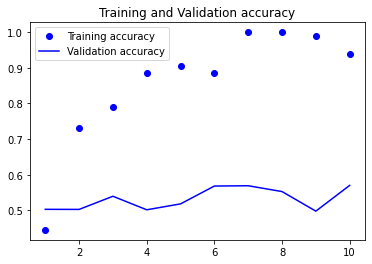

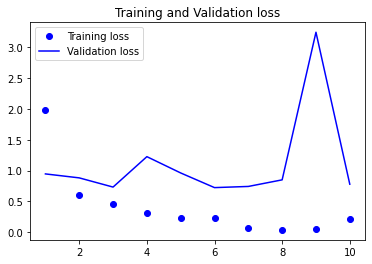

In [ ]:
# 결과 시각화
import matplotlib.pyplot as plt

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs=range(1, len(accuracy)+1)

plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and Validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and Validation loss")
plt.legend()
plt.show()

In [ ]:
# 가중치 저장
model.save_weights('/content/drive/MyDrive/files/model_200.h5')

In [ ]:
# 테스트 데이터 세트
#imdb_dir = './aclImdb'   # 파일 경로 지정
test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ['neg', 'pos']:   # 부정 리뷰, 긍정 리뷰 분류
  dir_name = os.path.join(test_dir, label_type)

  for fname in os.listdir(dir_name):
    if fname[-4:] == '.txt':    # 파일명 끝에 'txt' 를 붙여줌
      f = open(os.path.join(dir_name, fname), encoding='utf8')
      texts.append(f.read())
      f.close()

      if label_type == 'neg':
        labels.append(0)
      else:
        labels.append(1)

sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=max_length)
y_test = np.asarray(labels)

In [ ]:
model.load_weights('/content/drive/MyDrive/files/model_200.h5')   # 저장했던 가중치 업로드
model.evaluate(x_test, y_test)

782/782 [==============================] - 3s 4ms/step - loss: 0.7871 - accuracy: 0.5628


[0.7871153354644775, 0.5627599954605103]

#### 과제) trian_samples=2000 으로 실행

In [ ]:
import os

imdb_dir = './aclImdb'   # 파일 경로 지정
trian_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
  dir_name = os.path.join(train_dir, label_type)
  for fname in os.listdir(dir_name):
    if fname[-4:] == '.txt':
      f = open(os.path.join(dir_name, fname), encoding='utf8')
      texts.append(f.read())
      f.close()

      if label_type == 'neg':
        labels.append(0)
      else:
        labels.append(1)

In [ ]:
# 데이터 토큰화 (문장을 단어로 쪼갬)
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

max_length=100
train_samples=2000   # 데이터의 양을 2000 으로 늘림
validation_samples = 10000
max_words=10000      # 가장 많이 쓰이는 단어의 수

tokenizer = Tokenizer(num_words = max_words)   # 토큰화 객체 생성 (max_words = 10000)
tokenizer.fit_on_texts(texts)

sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print(len(word_index))

88582


In [ ]:
sequences

In [ ]:
data = pad_sequences(sequences, maxlen=max_length)
labels = np.asarray(labels)
print(data.shape, labels.shape)

(25000, 100) (25000,)


In [ ]:
# 훈련 세트와 검증 세트 분할
indices = np.arange(data.shape[0])
np.random.shuffle(indices)

# 랜덤하게 섞인 인덱스로 데이터 재배열
data = data[indices]
labels = labels[indices]

# 데이터 분할
# train_samples=2000, validation_samples = 10000
x_train = data[:train_samples]
y_train = labels[:train_samples]

x_val = data[train_samples : train_samples + validation_samples]
y_val = labels[train_samples : train_samples + validation_samples]

In [ ]:
#glove_dir = '/content/drive/MyDrive/files'

embedding_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'), encoding='utf8')
for line in f:
  values = line.split()
  word = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embedding_index[word] = coefs
f.close()

print(len(embedding_index))

400000


In [ ]:
embedding_index.get('the')

array([-0.038194, -0.24487 ,  0.72812 , -0.39961 ,  0.083172,  0.043953,
       -0.39141 ,  0.3344  , -0.57545 ,  0.087459,  0.28787 , -0.06731 ,
        0.30906 , -0.26384 , -0.13231 , -0.20757 ,  0.33395 , -0.33848 ,
       -0.31743 , -0.48336 ,  0.1464  , -0.37304 ,  0.34577 ,  0.052041,
        0.44946 , -0.46971 ,  0.02628 , -0.54155 , -0.15518 , -0.14107 ,
       -0.039722,  0.28277 ,  0.14393 ,  0.23464 , -0.31021 ,  0.086173,
        0.20397 ,  0.52624 ,  0.17164 , -0.082378, -0.71787 , -0.41531 ,
        0.20335 , -0.12763 ,  0.41367 ,  0.55187 ,  0.57908 , -0.33477 ,
       -0.36559 , -0.54857 , -0.062892,  0.26584 ,  0.30205 ,  0.99775 ,
       -0.80481 , -3.0243  ,  0.01254 , -0.36942 ,  2.2167  ,  0.72201 ,
       -0.24978 ,  0.92136 ,  0.034514,  0.46745 ,  1.1079  , -0.19358 ,
       -0.074575,  0.23353 , -0.052062, -0.22044 ,  0.057162, -0.15806 ,
       -0.30798 , -0.41625 ,  0.37972 ,  0.15006 , -0.53212 , -0.2055  ,
       -1.2526  ,  0.071624,  0.70565 ,  0.49744 , 

In [ ]:
# 데이터 정의
embedding_dim = 100
embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
  embedding_vector = embedding_index.get(word)

  if i < max_words:
    if embedding_vector is not None:
      embedding_matrix[i] = embedding_vector

In [ ]:
print(embedding_matrix.shape)
embedding_matrix[10]

(10000, 100)


array([-0.046539  ,  0.61966002,  0.56647003, -0.46584001, -1.18900001,
        0.44599   ,  0.066035  ,  0.31909999,  0.14679   , -0.22119001,
        0.79238999,  0.29905   ,  0.16073   ,  0.025324  ,  0.18678001,
       -0.31000999, -0.28108001,  0.60514998, -1.0654    ,  0.52476001,
        0.064152  ,  1.03579998, -0.40779001, -0.38011   ,  0.30801001,
        0.59964001, -0.26991001, -0.76034999,  0.94221997, -0.46919   ,
       -0.18278   ,  0.90652001,  0.79671001,  0.24824999,  0.25713   ,
        0.6232    , -0.44768   ,  0.65357   ,  0.76902002, -0.51229   ,
       -0.44332999, -0.21867   ,  0.38370001, -1.14830005, -0.94397998,
       -0.15062   ,  0.30012   , -0.57805997,  0.20175   , -1.65910006,
       -0.079195  ,  0.026423  ,  0.22051001,  0.99713999, -0.57538998,
       -2.72659993,  0.31448001,  0.70521998,  1.43809998,  0.99125999,
        0.13976   ,  1.34739995, -1.1753    ,  0.0039503 ,  1.02980006,
        0.064637  ,  0.90886998,  0.82871997, -0.47003001, -0.10

In [ ]:
# 모델 정의
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=max_length))
model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

# model.layers[0] 는 embedding layer
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 100)          1000000   
                                                                 
 flatten_1 (Flatten)         (None, 10000)             0         
                                                                 
 dense_2 (Dense)             (None, 32)                320032    
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,320,065
Trainable params: 320,065
Non-trainable params: 1,000,000
_________________________________________________________________


In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics='accuracy')

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

Epoch 1/10
63/63 [==============================] - 3s 31ms/step - loss: 0.8281 - accuracy: 0.5440 - val_loss: 0.6653 - val_accuracy: 0.6069
Epoch 2/10
63/63 [==============================] - 2s 28ms/step - loss: 0.6363 - accuracy: 0.6535 - val_loss: 0.6423 - val_accuracy: 0.6247
Epoch 3/10
63/63 [==============================] - 1s 20ms/step - loss: 0.5723 - accuracy: 0.7045 - val_loss: 0.6560 - val_accuracy: 0.6036
Epoch 4/10
63/63 [==============================] - 2s 29ms/step - loss: 0.4531 - accuracy: 0.8060 - val_loss: 0.6244 - val_accuracy: 0.6482
Epoch 5/10
63/63 [==============================] - 2s 28ms/step - loss: 0.3741 - accuracy: 0.8525 - val_loss: 0.7469 - val_accuracy: 0.6282
Epoch 6/10
63/63 [==============================] - 1s 20ms/step - loss: 0.2945 - accuracy: 0.8870 - val_loss: 0.6962 - val_accuracy: 0.6403
Epoch 7/10
63/63 [==============================] - 2s 29ms/step - loss: 0.2161 - accuracy: 0.9400 - val_loss: 0.8413 - val_accuracy: 0.6309
Epoch 8/10
63

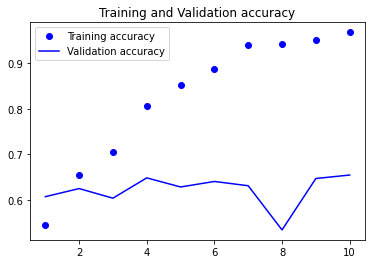

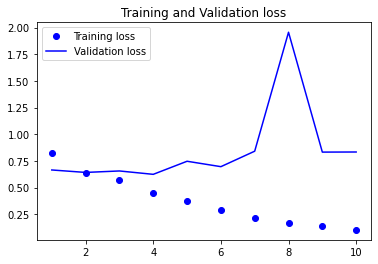

In [ ]:
# 결과 시각화
import matplotlib.pyplot as plt

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs=range(1, len(accuracy)+1)

plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and Validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and Validation loss")
plt.legend()
plt.show()

In [ ]:
# 가중치 저장
model.save_weights('/content/drive/MyDrive/files/model_2000.h5')

In [ ]:
model.load_weights('/content/drive/MyDrive/files/model_2000.h5')   # 저장했던 가중치 업로드
model.evaluate(x_test, y_test)

782/782 [==============================] - 3s 4ms/step - loss: 0.8355 - accuracy: 0.6489


[0.8354758024215698, 0.6488800048828125]

train_samples = 200 일때 :\
[0.7871153354644775, 0.5627599954605103]

## RNN (순환신경망)
- Recurrent Neural Network : 순환 신경망

- 기존의 전통적인 신경망의 경우, Input에 대한 순서와 지속성을 고려하지 않는다.

- RNN 은 순서와 더불어, 오래 전에 등장한 단어였어도 문맥 상 중요한 단어일 경우 기억한다.
 - 나중에 그 문맥을 해석할 때 사용할 수 있도록 정보의 지속성을 갖고 학습한다.

- 즉, 기존의 신경망과 달리 '순서' 와 '지속성' 을 고려한다.
 - 내부에 loop를 가진 네트워크 → 정보의 지속성

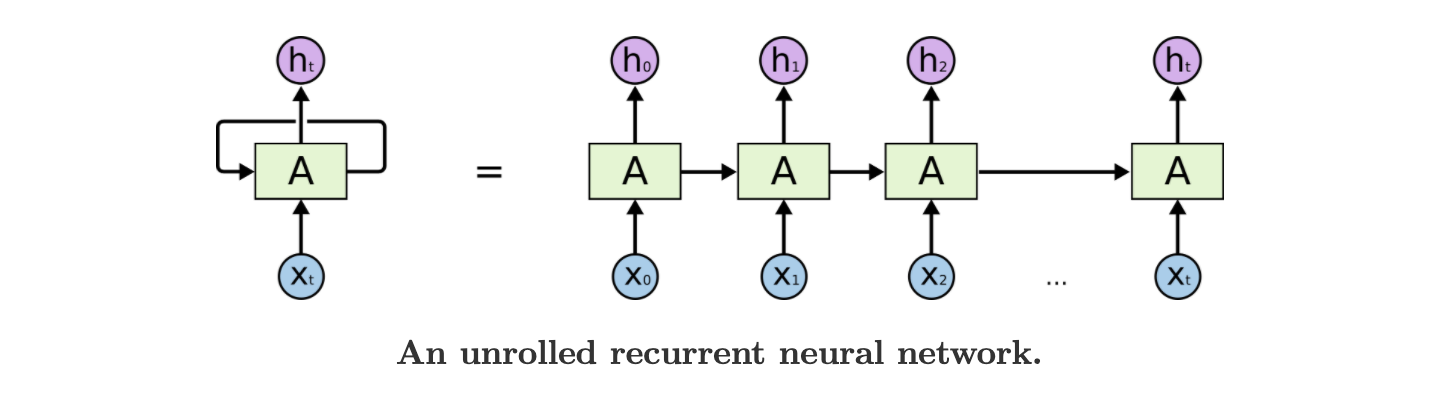

RNN 은 이전 Video Frame 을 사용하는 것이 현재 Frame의 이해를 알려주는 것과 같이 '이전 정보를 현재 작업에 연결할 수 있다' 는 것이다

때로는 현재 작업을 수행하기 위해 '최신 정보만' 이 필요한 경우가 있다\
예를 들어 언어 모델이 이전 단어를 기반으로 다음 단어를 예측한다고 가정한다면

“the clouds are in the sky.” 의 마지막 단어를 예측할 경우, 더 이상의 맥락이 필요하지 않다 (다음 단어는 sky임이 분명)

이러한 경우 관련 정보와 필요한 장소 사이의 간격이 작으므로, RNN는 과거 정보 사용 방법을 배우게 되는 것이다

하지만 이전 정보와 예측할 정보의 지점 사이의 간격이 커지게 되면 RNN 은 정보 연결을 할 수 없다

#### Feed Forward Network vs Recurrent Network

- Feed Forward Net (앞먹임 구조)
  - 일반적인 구조의 신경망
  - 입력층 → 은닉층 → 출력층으로 이어지는 단방향 구조
  - 이전 스텝의 출력이 영향을 받지 않음

- Recurrent Net (되먹임 구조)
  - 이전 층(Layer), 또는 스텝의 출력이 다시 입력으로 연결되는 신경망 구조
  - 각 스텝마다 이전 상태를 기억 시스템(Memory System)  
  - 현재 상태가 이전 상태에 종속


In [ ]:
# 마지막 timestep 만 출력
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 전체 상태 시퀀스 출력
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(units=32, return_sequences=True))
model.add(SimpleRNN(units=32, return_sequences=True))
model.add(SimpleRNN(units=32, return_sequences=True))
model.add(SimpleRNN(units=32))

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 32)                2080      
                                                                 
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# IMDB 데이터셋
from keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

max_features = 10000
max_len = 500
batch_size = 32

(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), len(input_test))

25000 25000


In [ ]:
# 시퀀스 패딩
input_train = sequence.pad_sequences(input_train, maxlen=max_len)
input_test = sequence.pad_sequences(input_test, maxlen=max_len)
print(len(input_train))
print(len(input_test))

25000
25000


In [ ]:
# embadding 층과 simpleRNN 층을 사용하여 순환 네트워크 훈련
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(1000, 32))
model.add(SimpleRNN(units=32, return_sequences=True))
model.add(SimpleRNN(units=32, return_sequences=True))
model.add(SimpleRNN(units=32))
model.add(Flatten())
model.add(Dense(units=1, activation='sigmoid'))

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, None, 32)          32000     
                                                                 
 simple_rnn_9 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_10 (SimpleRNN)   (None, None, 32)          2080      
                                                                 
 simple_rnn_11 (SimpleRNN)   (None, 32)                2080      
                                                                 
 flatten_2 (Flatten)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 38,273
Trainable params: 38,273
Non-trai

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics='accuracy')

history = model.fit(input_train, y_train,
                    epochs = 10,
                    batch_size = 128,
                    validation_split = 0.2) #train data에서 20%를 validation set로 사용

Epoch 1/10
157/157 [==============================] - 208s 1s/step - loss: 0.6176 - accuracy: 0.6413 - val_loss: 0.5060 - val_accuracy: 0.7612
Epoch 2/10
157/157 [==============================] - 201s 1s/step - loss: 0.4676 - accuracy: 0.7849 - val_loss: 0.4344 - val_accuracy: 0.8110
Epoch 3/10
157/157 [==============================] - 204s 1s/step - loss: 0.4184 - accuracy: 0.8173 - val_loss: 0.4826 - val_accuracy: 0.7642
Epoch 4/10
157/157 [==============================] - 205s 1s/step - loss: 0.3906 - accuracy: 0.8321 - val_loss: 0.4801 - val_accuracy: 0.7732
Epoch 5/10
157/157 [==============================] - 200s 1s/step - loss: 0.3631 - accuracy: 0.8454 - val_loss: 0.4312 - val_accuracy: 0.8080
Epoch 6/10
157/157 [==============================] - 203s 1s/step - loss: 0.3213 - accuracy: 0.8687 - val_loss: 0.4888 - val_accuracy: 0.7796
Epoch 7/10
157/157 [==============================] - 200s 1s/step - loss: 0.2855 - accuracy: 0.8855 - val_loss: 0.4896 - val_accuracy: 0.7996

In [ ]:
# 훈련 검증의 손실과 정확도 시각화


# 221214 Day77

## * LSTM
- RNN 은 '장기 의존성' 의 문제를 가진다

 - 적절한 정보와 그 정보가 필요한 곳과의 Gap이 적을 경우 RNN는 과거 정보를 이용해 잘 학습할 수 있지만,\
Gap이 클 경우에는 traditional RNN는 잘 동작하지 못한다 → 그레디언트 소실 문제가 발생하기 때문

- 이를 극복한 알고리즘이 바로 'LSTM' 이다
 - Long Short Term Memory Networks :\
장기 의존성을 학습할 수 있는 RNNs의 한 종류

- RNN 과는 달리 오랫동안 정보를 기억하는 기능을 갖는다

- 지속적으로 업데이트한 '이동 상태 (ct)' 를 추가하여 RNN 의 단점을 보완
 - LSTM은 오래된 이전의 데이터들을 '이동 상태 (ct)' 에 반영한다

- 정보를 여러 타임스탭에 걸쳐 나르는 방법을 추가하여, 시퀀스의 어느 지점에서 추출된 정보는 컨베이어 벨트 위에 올라가 필요한 시점의 타임스탭으로 이동하여 떨군다
- 개념적으로 데이터를 실어 나르는 이 흐름이 다음 출력과 상태를 조절한다

https://velog.io/@andy230/LSTM-%EC%8B%9C%EA%B0%81%EC%A0%81%EC%9C%BC%EB%A1%9C-%EC%9D%B4%ED%95%B4%ED%95%98%EA%B8%B0

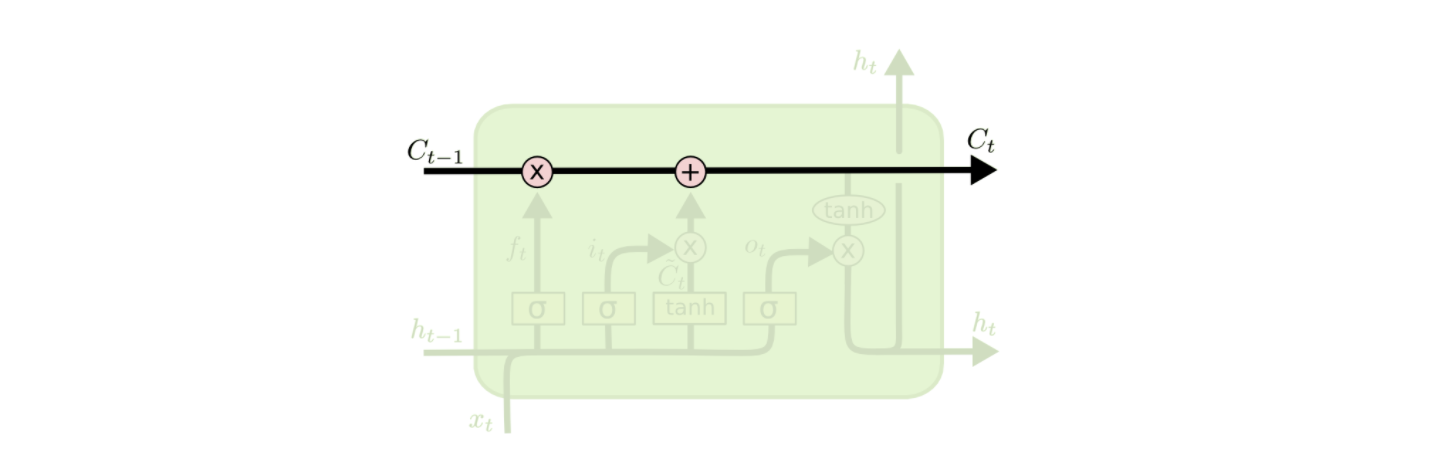

- LSTM의 핵심 Key는 diagram의 상단을 통과하는 수평선인 Cell State 이다

- Cell State는 일종의 컨베이어 벨트와 같다
 - 전체 Chain을 따라 직진하며, 약간의 작은 선형 상호작용이 있다

- 이를 통해 정보는 변하지 않으며, 그저 흘러가기 매우 쉽다

- **'Gate' 라고 불리는 구조물에 의해 세심하게 조절되는 Cell State 에\
정보를 제거 or 추가하는 기능** 을 갖는다
 - Sigmoid Layer 은 0과 1 사이의 숫자를 출력하며, 각 구성 요소 중 어느 정도가 통과되어야 하는지 설명한다.\
0 : 아무것도 통과시키지 말아라\
1 : 모든 것을 통과시켜라

 - LSTM에는 Cell State를 보호하고 제어하기 위한 3 Gate가 존재한다

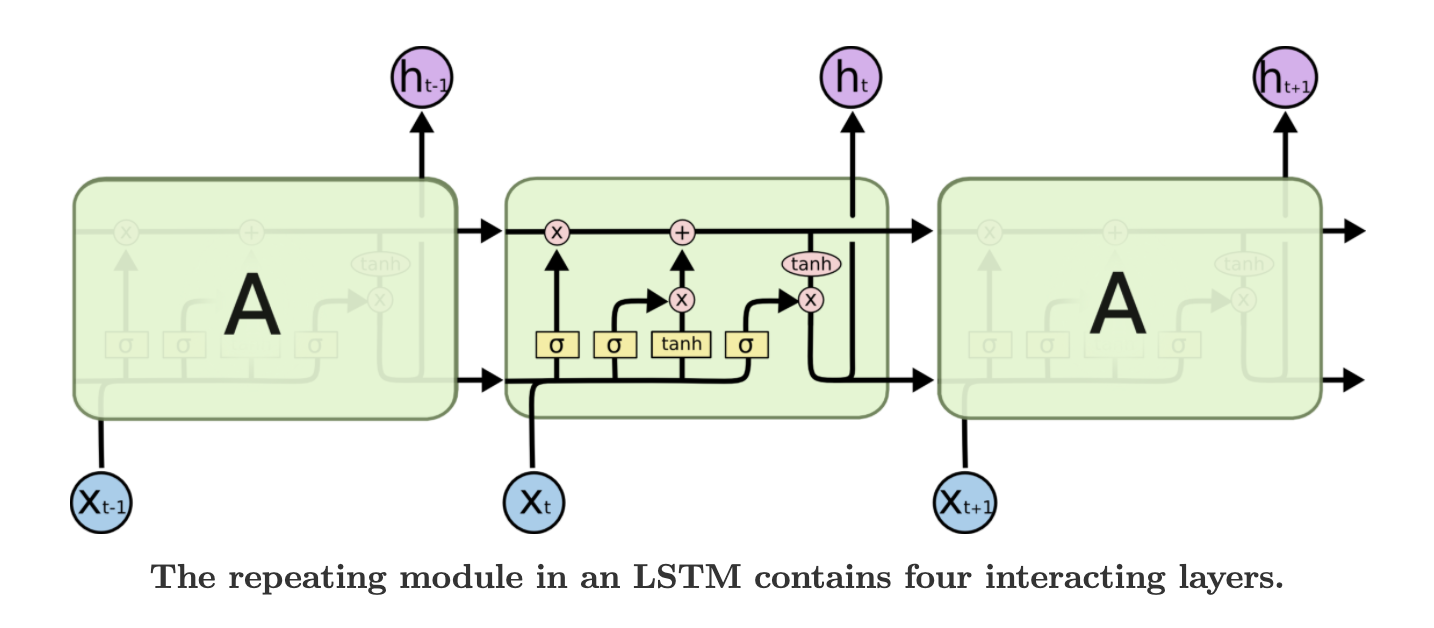

#### * LSTM의 First Step
- Cell State에서 어떤 정보를 버릴지 결정\
(Forget Gate Layer 라고 불리는 Sigmoid Layer에 의해 결정됨)

- 'h t−1' 와 'x t' 를 보고 Cell State 'C t−1' 의 각 번호에 대해 0 또는 1 를 출력한다
 - 1 은 '이것을 완전 유지' 를 나타내며,\
 0 은 '이것을 완전 제거' 를 나타낸다.

- 이전의 모든 단어를 기반으로 다음 단어를 예측하는 언어 모델의 예로 돌아가보면,\
이러한 문제에서, Cell State는 올바른 대명사를 사용할 수 있도록 현재 주체의 성별을 포함할 수 있다.\
나중에 우리가 새로운 주제를 봤을 때, 오래된 주제의 성별을 잊고 싶어하는 경우가 있다.

#### * Next Step
Cell State에 어떤 새로운 정보를 저장할지 결정한다

- Input Gate Layer 라고 불리는 Sigmoid Layer는 업데이트할 값을 결정한다.

- Tanh Layer 는 Cell State에 추가될 수 있는 새로운 후보 값인 C~t 의 벡터를 생성한다.

- 위의 두 단계의 값을 결합하여 State에 대한 업데이트를 만든다.

- 위의 언어 모델의 예로 돌아가보면,\
잊고 있는 오래된 것을 대체하기 위해 Cell State에 '새로운 주체의 성별을 추가' 하는 것이다

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM

# IMDB 데이터셋
from keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

max_features = 10000
max_len = 500
batch_size = 32

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), len(x_test))

17464789/17464789 [==============================] - 0s 0us/step
25000 25000


In [ ]:
print(x_train.shape)
print(x_test.shape)

(25000,)
(25000,)


In [ ]:
# 시퀀스 패딩
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)
print(len(x_train), x_train.shape)
print(len(x_test), x_test.shape)

25000 (25000, 500)
25000 (25000, 500)


In [ ]:
# embadding 층과 LSTM 층을 사용하여 순환 네트워크 훈련
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Embedding

model = Sequential()
model.add(Embedding(max_features, 32))
#model.add(LSTM(units=32, return_sequences=True))
#model.add(LSTM(units=32, return_sequences=True))
model.add(LSTM(units=32))
model.add(Flatten())
model.add(Dense(units=1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          32000     
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 flatten (Flatten)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 40,353
Trainable params: 40,353
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics='accuracy')

history = model.fit(x_train, y_train,
                    epochs = 10,
                    batch_size = 128,
                    validation_split = 0.2) #train data에서 20%를 validation set로 사용

Epoch 1/10
157/157 [==============================] - 6s 24ms/step - loss: 0.3002 - accuracy: 0.8790 - val_loss: 0.4717 - val_accuracy: 0.8268
Epoch 2/10
157/157 [==============================] - 3s 20ms/step - loss: 0.2914 - accuracy: 0.8819 - val_loss: 0.3398 - val_accuracy: 0.8576
Epoch 3/10
157/157 [==============================] - 3s 20ms/step - loss: 0.2866 - accuracy: 0.8815 - val_loss: 0.3438 - val_accuracy: 0.8506
Epoch 4/10
157/157 [==============================] - 3s 20ms/step - loss: 0.2818 - accuracy: 0.8850 - val_loss: 0.4077 - val_accuracy: 0.8242
Epoch 5/10
157/157 [==============================] - 3s 20ms/step - loss: 0.2798 - accuracy: 0.8838 - val_loss: 0.3521 - val_accuracy: 0.8508
Epoch 6/10
157/157 [==============================] - 3s 20ms/step - loss: 0.2776 - accuracy: 0.8864 - val_loss: 0.3878 - val_accuracy: 0.8532
Epoch 7/10
157/157 [==============================] - 3s 20ms/step - loss: 0.2757 - accuracy: 0.8877 - val_loss: 0.3527 - val_accuracy: 0.8556

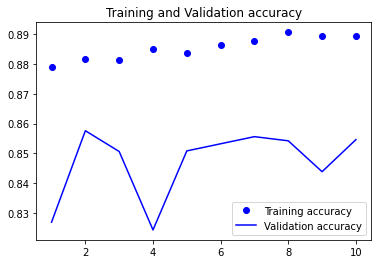

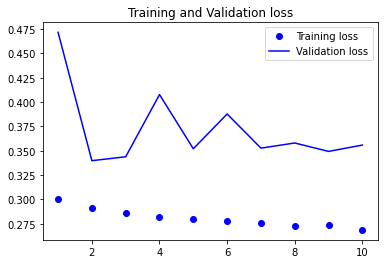

In [ ]:
# 결과 시각화
import matplotlib.pyplot as plt

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs=range(1, len(accuracy)+1)

plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and Validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and Validation loss")
plt.legend()
plt.show()

- 85% 정도의 정확도 달성
- 임베딩 차원이나 LSTM 출력 차원 같은 하이퍼 파라미터를 튜닝 및 규제를 통하여 성능 개선 필요
- LSTM 은 감정 분석과 같은 문제보다는 훨씬 더 복잡한 자연어 처리 문제들 (질의-응답, 기계번역 분야 등) 에서 뛰어난 능력을 발휘한다

## * 1D 컨브넷

- 데이터를 하나로 묶어서 처리 (비용 save), 후에 Conv1D 적용
- 단어의 순서 정보를 반영한다

- Conv1D 층을 사용하여 구현, Conv2D 와 인터페이스가 비슷하다
- (samples, time, features) 크기의 3D 텐서를 입력 받고, 비슷한 형태의 3D 텐서를 반환한다

- 합성곱 윈도우는 시간 축의 1D 윈도우이며, 입력 텐서의 두번째 축이다

- 긴 문장의 데이터에서 사용하기에는 한계가 있다

https://wikidocs.net/80437

- 2D convolution이 가로, 세로로 모두 이동하면서 output이 계산되는 것과 다르게\
1D convolution 연산은 위, 아래로만 이동하면서 output을 계산해낸다

- 입력 데이터가 각 단어가 벡터로 변환된 문장 행렬 이다\
(LSTM 과 입력 받는 형태가 동일)

- 1D 합성곱 연산에서 커널(필터)의 너비는 문장 행렬에서의 임베딩 벡터의 차원과 동일하다\
(그러므로 커널의 크기를 커널의 높이로 간주한다)

- 커널의 너비가 임베딩 벡터의 차원이라는 의미
 - 커널이 2D 합성곱 연산때와는 달리 너비 방향으로는 더 이상 움직일 곳이 없다는 것을 의미
 - 따라서 1D 합성곱 연산에서는 커널이 문장 행렬의 높이 방향으로만 움직이게 되어있다

- 커널의 크기(높이) 는 사용자가 변경할 수도 있다
 - CNN 에서의 커널은 신경망 관점으로는 '가중치 행렬' 이므로, 커널의 크기에 따라 학습하게 되는 파라미터의 수가 달라진다
 - 1D 합성곱 연산과 자연어 처리 관점에서는 커널의 크기에 따라 참고하는 "단어의 묶음의 크기" 가 달라진다
 - 이는 참고하는 'n-gram' 이 달라진다고 볼 수 있다\
 ( 커널의 크기가 2 라면 각 연산의 스텝에서 참고하는 것은 bigram,\
 커널의 크기가 3 이라면 각 연산의 스텝에서 참고하는 것은 trigram )

- 커널의 너비는 사용자가 변경할 수 없다\
(즉 학습할 수 있는 문장의 길이가 제한적이다, 너비보다 더 긴 문장은 학습할 수 없다)

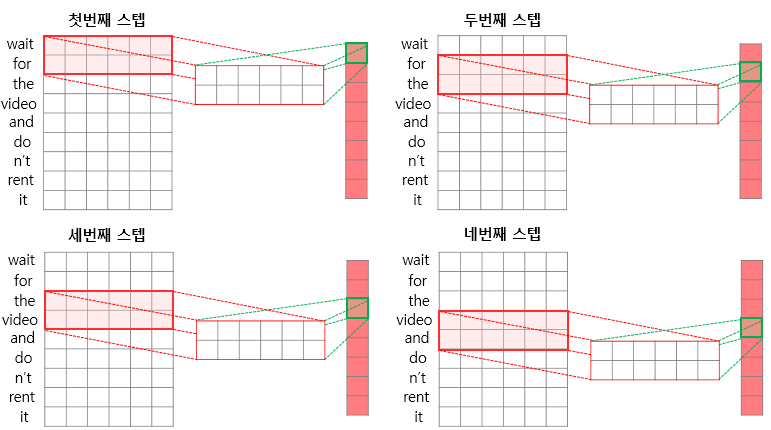

In [ ]:
from keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

max_features=10000
max_length = 500

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), len(x_test))

25000 25000


In [ ]:
from tensorflow.tools.docs.doc_controls import set_deprecated

# 시퀀스 패딩
x_train = sequence.pad_sequences(x_train, maxlen=max_length)
x_test = sequence.pad_sequences(x_test, maxlen=max_length)

print(x_train.shape, x_test.shape)

(25000, 500) (25000, 500)


In [ ]:
from matplotlib.axes import SecondaryAxis
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

# 모델 정의
model = Sequential()
model.add(layers.Embedding(max_features, 128, input_length=max_length))
model.add(layers.Conv1D(filters=32, kernel_size=7, activation='relu'))
model.add(layers.MaxPooling1D(pool_size=5))
model.add(layers.Conv1D(filters=32, kernel_size=7, activation='relu'))
model.add(layers.GlobalMaxPool1D())   # 1D 컨브넷에서 Dense 층에 연결하기 전에 Flatten 층 대신 사용
model.add(layers.Dense(units=1))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 128)          1280000   
                                                                 
 conv1d (Conv1D)             (None, 494, 32)           28704     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 98, 32)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 92, 32)            7200      
                                                                 
 global_max_pooling1d (Globa  (None, 32)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense_1 (Dense)             (None, 1)                

GlobalMaxPooling1D :\
여러 개의 벡터 정보 중 가장 큰 벡터를 골라서 반환

MaxPooling1D :\
입력벡터에서 특정 구간마다 값을 골라 벡터를 구성한 후 반환

In [ ]:
model.compile(optimizer = RMSprop(learning_rate=1e-4),
              loss = 'binary_crossentropy',
              metrics = 'accuracy')

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 8s 12ms/step - loss: 0.7286 - accuracy: 0.5243 - val_loss: 0.6844 - val_accuracy: 0.5802
Epoch 2/10
157/157 [==============================] - 2s 10ms/step - loss: 0.6626 - accuracy: 0.6905 - val_loss: 0.6631 - val_accuracy: 0.6602
Epoch 3/10
157/157 [==============================] - 2s 10ms/step - loss: 0.6152 - accuracy: 0.7728 - val_loss: 0.6071 - val_accuracy: 0.7416
Epoch 4/10
157/157 [==============================] - 2s 10ms/step - loss: 0.5202 - accuracy: 0.8153 - val_loss: 0.4857 - val_accuracy: 0.8076
Epoch 5/10
157/157 [==============================] - 2s 12ms/step - loss: 0.4032 - accuracy: 0.8523 - val_loss: 0.4193 - val_accuracy: 0.8348
Epoch 6/10
157/157 [==============================] - 2s 10ms/step - loss: 0.3338 - accuracy: 0.8784 - val_loss: 0.4125 - val_accuracy: 0.8524
Epoch 7/10
157/157 [==============================] - 2s 10ms/step - loss: 0.2919 - accuracy: 0.8963 - val_loss: 0.4037 - val_accuracy: 0.8584

검증 정확도는 LSTM 보다 조금 낮지만, CPU, GPU 에서 더 빠르게 실행된다\
이는 단어 수준의 감성 분류 작업에 순환 네트워크를 대신하여 빠르고 경제적인 1D 컨브넷을 사용할 수 있음을 보여준다

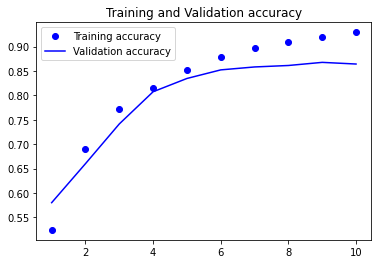

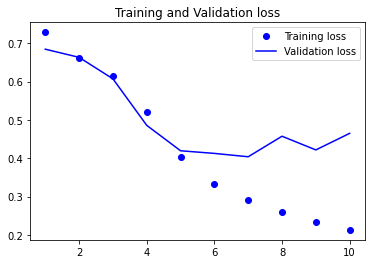

In [ ]:
# 결과 시각화
import matplotlib.pyplot as plt

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs=range(1, len(accuracy)+1)

plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and Validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and Validation loss")
plt.legend()
plt.show()

## * 시계열(1) - 주식 예측
https://velog.io/@lazy_learner/LSTM-%EC%8B%9C%EA%B3%84%EC%97%B4-%EC%98%88%EC%B8%A1-%EB%AA%A8%EB%93%88-%EB%A7%8C%EB%93%A4%EA%B8%B0-1

In [ ]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/files/TSLA.csv')
df[:5]

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-10,17.481333,17.533333,17.188000,17.276667,17.276667,39163500
1,2015-07-13,17.483334,17.503332,17.070000,17.477333,17.477333,44404500
2,2015-07-14,17.473333,17.732668,17.367332,17.709999,17.709999,28614000
3,2015-07-15,17.782667,17.832666,17.472000,17.542667,17.542667,30324000
4,2015-07-16,17.614668,17.813334,17.544001,17.778667,17.778667,24240000


In [ ]:
df.shape

(1259, 7)

In [ ]:
train_set = df.iloc[:800, 1:2].values   # array 로 변환
test_set = df.iloc[800:, 1:2].values

In [ ]:
# 데이터 스케일링
sc = MinMaxScaler(feature_range = (0, 1))   # 0 에서 1 사이로 스케일링
train_set_scaled = sc.fit_transform(train_set)

x_train = []
y_train = []

# time-steps : 60, output : 1  (시계열 데이터는 '순서' 가 중요하다)
for i in range(60, 800):
  x_train.append(train_set_scaled[i-60 : i, 0])   # i=0 이라면 0 부터 59 까지 60개
  y_train.append(train_set_scaled[i, 0])          # 60 번째 값 (그 다음 값을 예측)

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [ ]:
x_train.shape

(740, 60, 1)

In [ ]:
print(y_train[0])   # 첫번째 y 값 (인덱스 : 61)
x_train[1][-1]      # 두번째 x_train 값 (인덱스 : 1~61)

0.43589637508483803


array([0.43589638])

In [ ]:
print(y_train[1])
x_train[2][-1]

0.3997217416156186


array([0.39972174])

In [ ]:
# LSTM 을 사용해 모델 생성
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,
               input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=1))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 5

In [ ]:
model.compile(optimizer='adam',
              loss = 'mean_squared_error',
              metrics = 'mean_absolute_error')

model.fit(x_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
24/24 [==============================] - 9s 94ms/step - loss: 0.0790 - mean_absolute_error: 0.2073
Epoch 2/100
24/24 [==============================] - 2s 93ms/step - loss: 0.0150 - mean_absolute_error: 0.0992
Epoch 3/100
24/24 [==============================] - 2s 93ms/step - loss: 0.0119 - mean_absolute_error: 0.0842
Epoch 4/100
24/24 [==============================] - 2s 92ms/step - loss: 0.0111 - mean_absolute_error: 0.0801
Epoch 5/100
24/24 [==============================] - 2s 95ms/step - loss: 0.0100 - mean_absolute_error: 0.0781
Epoch 6/100
24/24 [==============================] - 2s 94ms/step - loss: 0.0106 - mean_absolute_error: 0.0767
Epoch 7/100
24/24 [==============================] - 2s 94ms/step - loss: 0.0096 - mean_absolute_error: 0.0742
Epoch 8/100
24/24 [==============================] - 2s 93ms/step - loss: 0.0093 - mean_absolute_error: 0.0751
Epoch 9/100
24/24 [==============================] - 2s 94ms/step - loss: 0.0093 - mean_absolute_error: 0.0745
E

In [ ]:
# 테스트 데이터

train_dataset = df.iloc[:800, 1:2]
test_dataset = df.iloc[800:, 1:2]

total_dataset = pd.concat((train_dataset, test_dataset), axis=0)
inputs = total_dataset[( len(total_dataset) - len(test_dataset) - 60 ): ].values
# len(total_dataset) - len(test_dataset) = len(train_dataset)

inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)   # 데이터 스케일링

x_test = []
for i in range(60, 519):    # train 데이터 세트를 만들 때 범위가 range(60, 800) 였으므로 (1259 - 800 + 60 = 519)
  x_test.append(inputs[i-60 : i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(459, 60, 1)

In [ ]:
# 새로운 데이터 예측
pred = model.predict(x_test)

# 스케일링 했던 것 되돌리기
predicted_stock_price = sc.inverse_transform(pred)

15/15 [==============================] - 2s 27ms/step


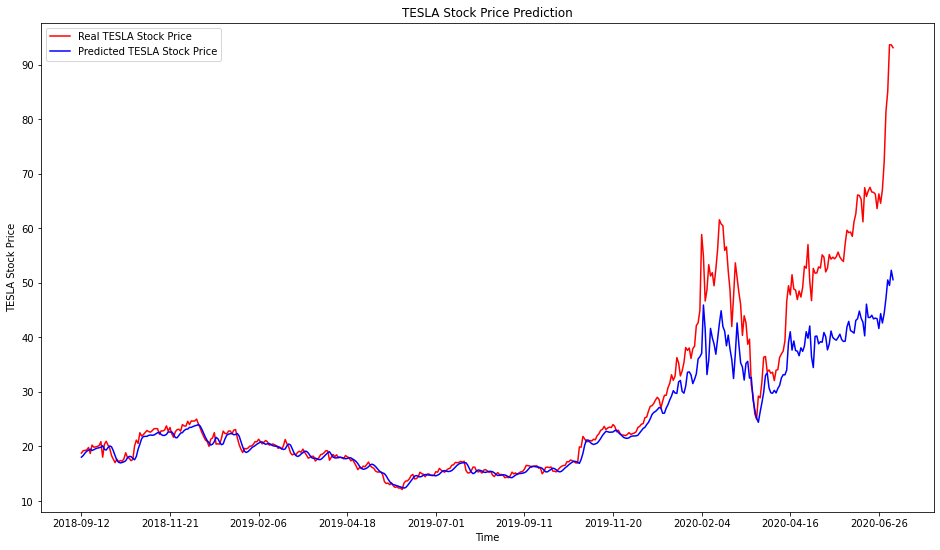

In [ ]:
# 결과 시각화
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(16, 9))

plt.plot(df.loc[800:, 'Date'], test_dataset.values,
         color='red', label='Real TESLA Stock Price')

plt.plot(df.loc[800:, 'Date'], predicted_stock_price,
         color='blue', label='Predicted TESLA Stock Price')

plt.xticks(np.arange(0, 459, 50))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

## * 시계열(2) - 기온예측
https://www.tensorflow.org/api_docs/python/tf/keras/utils/timeseries_dataset_from_array

In [ ]:
# 예나 날씨 데이터
!wget https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
!unzip jena_climate_2009_2016.csv.zip

--2022-12-15 00:16:05--  https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.221.24, 52.217.44.238, 52.217.236.168, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.221.24|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13565642 (13M) [application/zip]
Saving to: ‘jena_climate_2009_2016.csv.zip’

jena_climate_2009_2 100%[===================>]  12.94M  5.13MB/s    in 2.5s    

2022-12-15 00:16:08 (5.13 MB/s) - ‘jena_climate_2009_2016.csv.zip’ saved [13565642/13565642]

Archive:  jena_climate_2009_2016.csv.zip
  inflating: jena_climate_2009_2016.csv  
  inflating: __MACOSX/._jena_climate_2009_2016.csv  


In [ ]:
ls

drive/                      jena_climate_2009_2016.csv.zip  sample_data/
jena_climate_2009_2016.csv  __MACOSX/


In [ ]:
import os
fname = os.path.join("jena_climate_2009_2016.csv")

with open(fname) as f:
  data = f.read()

lines = data.split("\n")
header = lines[0].split(",")
lines = lines[1:]

print(header)
print(len(lines))

['"Date Time"', '"p (mbar)"', '"T (degC)"', '"Tpot (K)"', '"Tdew (degC)"', '"rh (%)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"sh (g/kg)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"max. wv (m/s)"', '"wd (deg)"']
420451


In [ ]:
# 데이터 파싱 (42만 451개의 데이터 전체를 넘파이 배열로 변환)
import numpy as np

temperature = np.zeros((len(lines), ))   # 온도(섭씨) 를 하나의 배열로
raw_data = np.zeros((len(lines), len(header) - 1))   # 나머지 데이터 (미래 온도를 예측하기 위해 사용할 특성)

for i, line in enumerate(lines):
  values = [float(x) for x in line.split(",")[1:]]
  temperature[i] = values[1]   # 두번째 열을 저장
  raw_data[i, :] = values[:]   # 모든 열을 저장

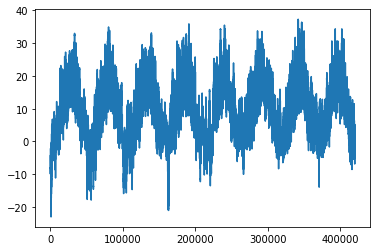

In [ ]:
# 전체 온도
import matplotlib.pyplot as plt

#plt.figure(figsize=(16, 9))
plt.plot(range(len(temperature)), temperature)
plt.show()

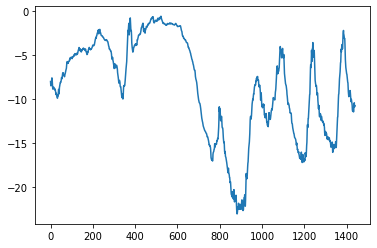

In [ ]:
# 처음 10일 간의 기온 (10분마다 데이터가 기록되므로 하루에 총 144개의 데이터 포인트 존재 -> 10일은 1440개)
#plt.figure(figsize=(16, 9))
plt.plot(range(1440), temperature[:1440])
plt.show()

In [ ]:
len(raw_data)

420451

In [ ]:
# 각 분할에 사용할 샘플 수 계산
num_train_samples = int(0.5 * len(raw_data))   # 처음 50% 의 데이터를 훈련에 사용
num_val_samples = int(0.25 * len(raw_data))    # 25%
num_test_samples = len(raw_data) - num_train_samples - num_val_samples

print(num_train_samples, num_val_samples, num_test_samples)

210225 105112 105114


In [ ]:
## 데이터 정규화 (데이터를 신경망에 주입할 수 있는 형태로 전처리)
# 데이터 내의 시계열 스케일이 각기 다르기 때문에,
# 각 시계열을 독립적으로 정규화하여 비슷한 범위를 가진 작은 값으로 변환

mean = raw_data[:num_train_samples].mean(axis=0)
raw_data -= mean

std = raw_data[:num_train_samples].std(axis=0)
raw_data /= std

In [ ]:
## 훈련, 검증, 테스트 데이터 생성
# 시계열 데이터를 다룰 때는 검증 데이터와 테스트 데이터가 훈련 데이터보다 최신이어야 한다 (과거를 바탕으로 미래를 예측하기 때문)
# raw_data 는 14개의 관측치가 10분 마다 기록되어 있는 값들의 모음 (shape=(420451, 14))
from tensorflow import keras

sampling_rate = 6   # 10분 단위의 데이터 6개 --> 즉 '1시간' 을 의미
sequence_length = 120    # 이전 5일간(24x5 = 120 시간)의 데이터 사용

# 시퀀스의 타깃은 시퀀스 끝에서 24시간 후의 온도
# '-1' 은 인덱스 번호라서 하나 빼준 것
# sampling_rate 를 곱함으로써 시간 단위를 '분' 단위로 변환시켜줌 (raw_data 에 대입하기 위함)
delay = sampling_rate * (sequence_length + 24 - 1)   #858
batch_size = 256

train_dataset = keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay],               # x_data
    targets = temperature[delay:],   # y_label
    sampling_rate = sampling_rate,
    sequence_length = sequence_length,   # 시퀀스의 길이
    shuffle=True,   # 샘플을 랜덤하게 섞는다
    batch_size=batch_size,               # 시퀀스의 배치 크기
    start_index=0,
    end_index=num_train_samples
)

val_dataset = keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay],
    targets = temperature[delay:],
    sampling_rate = sampling_rate,
    sequence_length = sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=num_train_samples,
    end_index=num_train_samples + num_val_samples
)

test_dataset = keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay],
    targets = temperature[delay:],
    sampling_rate = sampling_rate,
    sequence_length = sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=num_train_samples + num_val_samples
)

* shuffle=True

 - 훈련 데이터를 순서대로 학습하는 것보다 랜덤하게 선택한 샘플을 사용하여 손실 함수를 적용하면 지역 최소값을 벗어나기 쉽고, 데이터셋에 과대적합 되는 것을 줄일 수 있다

 - 보통은 에포크마다 전체 데이터셋을 무작위로 섞지만, 시계열 데이터는 전체를 섞지 않고 임의의 위치에서 시퀀스를 추출한다

In [ ]:
# 배치 크기 확인
for samples, targets in train_dataset:
  print('샘플 크기:', samples.shape)
  print('타깃 크기:', targets.shape)
  break

샘플 크기: (256, 120, 14)
타깃 크기: (256,)


In [ ]:
raw_data.shape

(420451, 14)

In [ ]:
# 밀집 연결 모델 정의 및 훈련, 평가
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))   # shape = (120, 14)

x = layers.Flatten()(inputs)
x = layers.Dense(units=16, activation='relu')(x)

outputs = layers.Dense(units=1)(x)   # 회귀 문제 이므로 마지막 층에 활성화 함수를 넣지 않는다 (분류할 필요없이 값이 바로 나오면 되므로)

model = keras.Model(inputs, outputs)

In [ ]:
# 콜백을 사용해서 최상의 모델 저장
callbacks = [
    keras.callbacks.ModelCheckpoint('jena_dense.keras',
                                    save_best_only=True)
]

model.compile(optimizer='rmsprop',
              loss='mse',     # '분류' 가 아닌 '회귀' 문제 이므로 'mse' 사용
              metrics='mae')

history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=val_dataset,
                    callbacks=callbacks)

Epoch 1/10
819/819 [==============================] - 41s 46ms/step - loss: 13.5826 - mae: 2.8430 - val_loss: 10.8302 - val_mae: 2.6012
Epoch 2/10
819/819 [==============================] - 46s 56ms/step - loss: 9.3838 - mae: 2.4058 - val_loss: 11.8379 - val_mae: 2.7286
Epoch 3/10
819/819 [==============================] - 39s 47ms/step - loss: 8.4851 - mae: 2.2924 - val_loss: 10.7729 - val_mae: 2.6048
Epoch 4/10
819/819 [==============================] - 40s 48ms/step - loss: 7.9202 - mae: 2.2158 - val_loss: 11.0083 - val_mae: 2.6347
Epoch 5/10
819/819 [==============================] - 46s 56ms/step - loss: 7.5686 - mae: 2.1682 - val_loss: 12.5064 - val_mae: 2.8174
Epoch 6/10
819/819 [==============================] - 39s 47ms/step - loss: 7.3253 - mae: 2.1332 - val_loss: 11.2073 - val_mae: 2.6580
Epoch 7/10
819/819 [==============================] - 39s 47ms/step - loss: 7.1168 - mae: 2.1034 - val_loss: 11.2984 - val_mae: 2.6737
Epoch 8/10
819/819 [==============================] - 

In [ ]:
# 저장했던 최상의 모델 다시 로드
model = keras.models.load_model('jena_dense.keras')

# 모델 평가
print(f'테스트 MAE: {model.evaluate(test_dataset)[1]:.2f}')

405/405 [==============================] - 13s 31ms/step - loss: 11.7012 - mae: 2.6745
테스트 MAE: 2.67


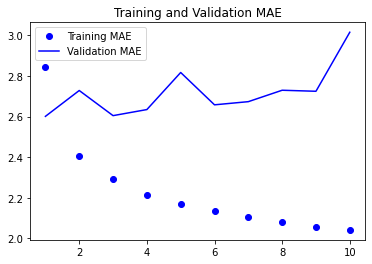

In [ ]:
# 결과 그래프
#import matplotlib.pyplot as plt

loss = history.history['mae']
val_loss = history.history['val_mae']
epochs = range(1, len(loss) + 1)
plt.figure()

plt.plot(epochs, loss, "bo", label='Training MAE')
plt.plot(epochs, val_loss, "b", label='Validation MAE')
plt.title("Training and Validation MAE")
plt.legend()
plt.show()

밀집 연결 모델은 시계열 데이터를 펼쳤기 때문에 입력 데이터에서 시간 개념을 잃어버렸다

In [ ]:
# 상식 수준 모델의 MAE (MAE 값은 작을수록 좋다)
# 검증 MAE : 2.44
# 테스트 MAE : 2.62

### 과제1) 1D 합성곱 모델 시도

In [ ]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))   # shape = (120, 14)

x = layers.Conv1D(filters=24, kernel_size=8, activation='relu')(inputs)
x = layers.MaxPooling1D(pool_size=2)(x)
x = layers.Conv1D(filters=12, kernel_size=8, activation='relu')(x)
x = layers.MaxPooling1D(pool_size=2)(x)
x = layers.Conv1D(filters=6, kernel_size=8, activation='relu')(x)
x = layers.GlobalAveragePooling1D()(x)   # 하나로 합침

outputs = layers.Dense(units=1)(x)       # 회귀 문제 이므로 활성화 함수 X

model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("jena_conv.keras",
                                    save_best_only=True)
]

model.compile(optimizer='rmsprop', loss='mse', metrics='mae')

history = model.fit(train_dataset, epochs=10,
                    validation_data = val_dataset,
                    callbacks = callbacks)

model = keras.models.load_model("jena_conv.keras")
print(f'테스트 MAE: {model.evaluate(test_dataset)[1]:.2f}')

Epoch 1/10
819/819 [==============================] - 46s 48ms/step - loss: 22.5181 - mae: 3.7582 - val_loss: 16.8427 - val_mae: 3.2944
Epoch 2/10
819/819 [==============================] - 39s 47ms/step - loss: 17.4211 - mae: 3.3108 - val_loss: 14.7179 - val_mae: 3.0523
Epoch 3/10
819/819 [==============================] - 40s 49ms/step - loss: 15.6611 - mae: 3.1344 - val_loss: 16.1800 - val_mae: 3.1322
Epoch 4/10
819/819 [==============================] - 39s 47ms/step - loss: 14.5382 - mae: 3.0185 - val_loss: 15.3425 - val_mae: 3.1264
Epoch 5/10
819/819 [==============================] - 39s 47ms/step - loss: 13.7263 - mae: 2.9325 - val_loss: 14.7410 - val_mae: 3.0366
Epoch 6/10
819/819 [==============================] - 39s 47ms/step - loss: 13.0461 - mae: 2.8553 - val_loss: 17.2766 - val_mae: 3.2679
Epoch 7/10
819/819 [==============================] - 39s 47ms/step - loss: 12.4991 - mae: 2.7978 - val_loss: 14.5265 - val_mae: 3.0020
Epoch 8/10
819/819 [============================

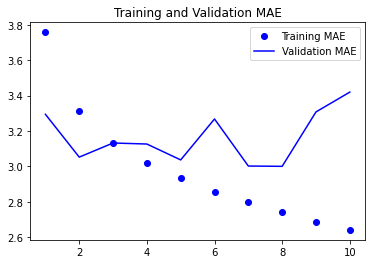

In [ ]:
# 결과 그래프
#import matplotlib.pyplot as plt

loss = history.history['mae']
val_loss = history.history['val_mae']
epochs = range(1, len(loss) + 1)
plt.figure()

plt.plot(epochs, loss, "bo", label='Training MAE')
plt.plot(epochs, val_loss, "b", label='Validation MAE')
plt.title("Training and Validation MAE")
plt.legend()
plt.show()

1D 합성곱 모델은 데이터의 모든 부분을 비슷한 방식으로 처리했으며, pooling 을 적용하여 순서 정보를 잃어버렸다

### 과제2) LSTM 기반 모델 시도

In [ ]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))   # shape = (120, 14)
x = layers.LSTM(units=16)(inputs)
outputs = layers.Dense(units=1)(x)

model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("jena_lstm.keras",
                                    save_best_only=True)
]

model.compile(optimizer='rmsprop', loss='mse', metrics='mae')

history = model.fit(train_dataset, epochs=10,
                    validation_data = val_dataset,
                    callbacks = callbacks)

model = keras.models.load_model("jena_lstm.keras")
print(f'테스트 MAE: {model.evaluate(test_dataset)[1]:.2f}')

Epoch 1/10
819/819 [==============================] - 45s 51ms/step - loss: 39.0415 - mae: 4.5651 - val_loss: 12.9508 - val_mae: 2.7308
Epoch 2/10
819/819 [==============================] - 42s 51ms/step - loss: 11.2582 - mae: 2.6083 - val_loss: 9.7194 - val_mae: 2.4440
Epoch 3/10
819/819 [==============================] - 42s 51ms/step - loss: 9.8696 - mae: 2.4480 - val_loss: 9.7056 - val_mae: 2.4333
Epoch 4/10
819/819 [==============================] - 42s 51ms/step - loss: 9.2987 - mae: 2.3726 - val_loss: 9.9182 - val_mae: 2.4376
Epoch 5/10
819/819 [==============================] - 42s 51ms/step - loss: 8.9164 - mae: 2.3257 - val_loss: 10.2749 - val_mae: 2.4771
Epoch 6/10
819/819 [==============================] - 42s 51ms/step - loss: 8.5759 - mae: 2.2848 - val_loss: 10.3637 - val_mae: 2.4786
Epoch 7/10
819/819 [==============================] - 42s 51ms/step - loss: 8.3335 - mae: 2.2537 - val_loss: 10.7763 - val_mae: 2.5390
Epoch 8/10
819/819 [==============================] - 42

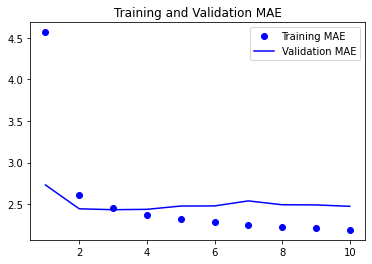

In [ ]:
# 결과 그래프
#import matplotlib.pyplot as plt

loss = history.history['mae']
val_loss = history.history['val_mae']
epochs = range(1, len(loss) + 1)
plt.figure()

plt.plot(epochs, loss, "bo", label='Training MAE')
plt.plot(epochs, val_loss, "b", label='Validation MAE')
plt.title("Training and Validation MAE")
plt.legend()
plt.show()

### 과제3) RNN 기반 모델 시도 (스태킹)

In [ ]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))   # shape = (120, 14)

# return_sequences=True : 중간층들이 전체 출력 시퀀스를 반환하도록
# 케라스에서 순환 층을 차례대로 쌓으려면 (스태킹) 모든 중간층은 '전체 시퀀스 (랭크-3 텐서)' 를 출력해야 한다
x = layers.SimpleRNN(units=16, return_sequences=True)(inputs)
x = layers.SimpleRNN(units=16, return_sequences=True)(x)

outputs = layers.SimpleRNN(units=16)(x)

model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("jena_stacked_rnn.keras",
                                    save_best_only=True)
]

model.compile(optimizer='rmsprop', loss='mse', metrics='mae')

history = model.fit(train_dataset, epochs=10,
                    validation_data = val_dataset,
                    callbacks = callbacks)

model = keras.models.load_model("jena_stacked_rnn.keras")
print(f'테스트 MAE: {model.evaluate(test_dataset)[1]:.2f}')

Epoch 1/10
819/819 [==============================] - 308s 373ms/step - loss: 136.8489 - mae: 9.5723 - val_loss: 143.4745 - val_mae: 9.8439
Epoch 2/10
819/819 [==============================] - 303s 369ms/step - loss: 135.9940 - mae: 9.5186 - val_loss: 143.4310 - val_mae: 9.8373
Epoch 3/10
819/819 [==============================] - 302s 368ms/step - loss: 135.9142 - mae: 9.5071 - val_loss: 143.4397 - val_mae: 9.8398
Epoch 4/10
819/819 [==============================] - 300s 366ms/step - loss: 135.8941 - mae: 9.5035 - val_loss: 143.4178 - val_mae: 9.8368
Epoch 5/10
819/819 [==============================] - 313s 382ms/step - loss: 135.8719 - mae: 9.5004 - val_loss: 143.4445 - val_mae: 9.8417
Epoch 6/10
819/819 [==============================] - 300s 367ms/step - loss: 135.8558 - mae: 9.4978 - val_loss: 143.4003 - val_mae: 9.8355
Epoch 7/10
819/819 [==============================] - 297s 363ms/step - loss: 135.8456 - mae: 9.4971 - val_loss: 143.3997 - val_mae: 9.8364
Epoch 8/10
819/819 [

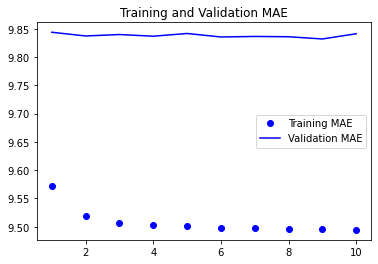

In [ ]:
# 결과 그래프
#import matplotlib.pyplot as plt

loss = history.history['mae']
val_loss = history.history['val_mae']
epochs = range(1, len(loss) + 1)
plt.figure()

plt.plot(epochs, loss, "bo", label='Training MAE')
plt.plot(epochs, val_loss, "b", label='Validation MAE')
plt.title("Training and Validation MAE")
plt.legend()
plt.show()

### 과제4) 드롭아웃 규제를 적용한 LSTM 모델 훈련 및 평가

In [ ]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))   # shape = (120, 14)

# recurrent_dropout (순환 드롭 아웃) : 순환 층 내부 계산에 사용된 활성화 함수에 타임스텝마다 동일한 드롭아웃을 적용
# (순환 층에 의해 만들어지는 표현을 규제)
# 드롭아웃 덕분에 규제를 위해 네트워크 크기에 신경쓸 필요가 없으므로 유닛수 2배(=32)
x = layers.LSTM(units=32, recurrent_dropout=0.25)(inputs)

x = layers.Dropout(0.5)(x)   # Dense 층에 규제를 추가하기 위함
outputs = layers.Dense(units=1)(x)

model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("jena_lstm_dropout.keras",
                                    save_best_only=True)
]

model.compile(optimizer='rmsprop', loss='mse', metrics='mae')

history = model.fit(train_dataset, epochs=50,   # 드롭아웃으로 규제된 네트워크는 완전히 수렴하는데 훨씬 더 오래 걸리므로 epoch를 2배 더 늘림
                    validation_data = val_dataset,
                    callbacks = callbacks)

model = keras.models.load_model("jena_lstm.keras")
print(f'테스트 MAE: {model.evaluate(test_dataset)[1]:.2f}')

NameError: ignored

In [ ]:
# 결과 그래프
#import matplotlib.pyplot as plt

loss = history.history['mae']
val_loss = history.history['val_mae']
epochs = range(1, len(loss) + 1)
plt.figure()

plt.plot(epochs, loss, "bo", label='Training MAE')
plt.plot(epochs, val_loss, "b", label='Validation MAE')
plt.title("Training and Validation MAE")
plt.legend()
plt.show()

### 과제5) 드롭아웃 규제와 스태킹을 적용한 GRU 모델 훈련 및 평가
GRU 는 LSTM 과 매우 비슷하다\
GRU 는 LSTM 구조의 간단하고 간소화된 버전이라고 생각할 수 있다

In [ ]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))   # shape = (120, 14)

# recurrent_dropout : 순환 드롭 아웃
# return_sequences=True : 스태킹, 전체 시퀀스 출력
x = layers.GRU(units=32, recurrent_dropout=0.5, return_sequences=True)(inputs)
x = layers.GRU(units=32, recurrent_dropout=0.5)(x)
x = layers.Dropout(0.5)(x)   # Dense 층에 규제를 추가하기 위함

outputs = layers.Dense(units=1)(x)

model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("jena_stacked_gru_dropout.keras",
                                    save_best_only=True)
]

model.compile(optimizer='rmsprop', loss='mse', metrics='mae')

history = model.fit(train_dataset, epochs=50,   # 드롭아웃으로 규제된 네트워크는 완전히 수렴하는데 훨씬 더 오래 걸리므로 epoch를 2배 더 늘림
                    validation_data = val_dataset,
                    callbacks = callbacks)

model = keras.models.load_model("jena_stacked_gru_dropout.keras")
print(f'테스트 MAE: {model.evaluate(test_dataset)[1]:.2f}')

In [ ]:
# 결과 그래프
#import matplotlib.pyplot as plt

loss = history.history['mae']
val_loss = history.history['val_mae']
epochs = range(1, len(loss) + 1)
plt.figure()

plt.plot(epochs, loss, "bo", label='Training MAE')
plt.plot(epochs, val_loss, "b", label='Validation MAE')
plt.title("Training and Validation MAE")
plt.legend()
plt.show()

# 221215 Day78

## PyTorch (파이토치)
* 페이스북이 초기 루아(Lua) 언어로 개발된 토치(Torch)를 파이썬 버전으로 개발하여 2017년도에 공개
* 초기의 토치(Torch)는 넘파이(NumPy) 라이브러리처럼 과학 연산을 위한 라이브러리로 공개
* 이후 GPU를 이용한 텐서 조작 및 동적 신경망 구축이 가능하도록 딥러닝 프레임워크로 발전시킴
* 파이썬답게 만들어졌고, 유연하면서도 가속화된 계산 속도를 제공

* 파이토치의 구성요소

 - `torch`:\
 메인 네임스페이스, 텐서 등의 다양한 수학 함수가 포함
 - `torch.autograd`:\
 자동 미분 기능을 제공하는 라이브러리
 - `torch.nn`:\
 신경망 구축을 위한 데이터 구조나 레이어 등의 라이브러리
 - `torch.multiprocessing`:\
 병럴처리 기능을 제공하는 라이브러리
 - `torch.optim`:\
 SGD(Stochastic Gradient Descent)를 중심으로 한 파라미터 최적화 알고리즘 제공
 - `torch.utils`:\
 데이터 조작 등 유틸리티 기능 제공
 - `torch.onnx`:\
 ONNX(Open Neural Network Exchange), 서로 다른 프레임워크 간의 모델을 공유할 때 사용


* 텐서(Tensors)
 - 데이터 표현을 위한 기본 구조로 텐서(tensor) 를 사용
 - 텐서는 데이터를 담기위한 컨테이너(container) 로서 일반적으로 수치형 데이터를 저장
 - 넘파이(NumPy )의 ndarray 와 유사
 - GPU 를 사용한 연산 가속 가능


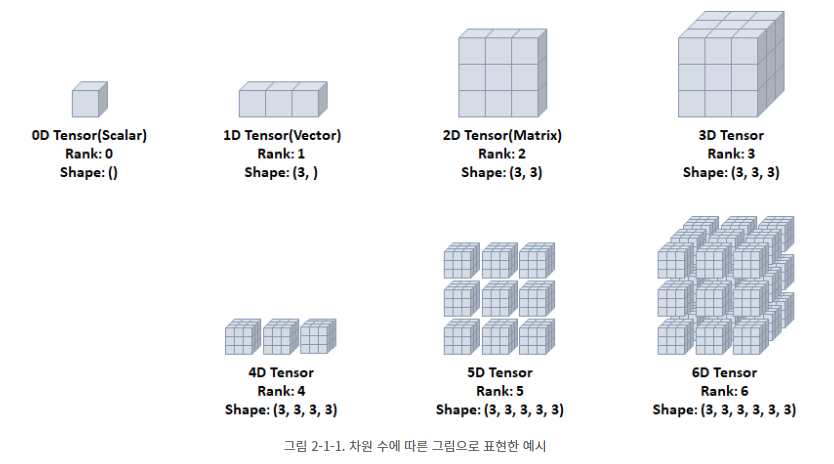

In [ ]:
import torch
torch.__version__

'1.13.0+cu116'

### (1) 텐서 초기화와 데이터 타입

* 초기화 되지 않은 텐서

In [ ]:
x = torch.empty(4, 2)
print(x)

tensor([[2.7622e-34, 0.0000e+00],
        [3.5032e-44, 0.0000e+00],
        [       nan, 0.0000e+00],
        [1.1578e+27, 7.1463e+22]])


In [ ]:
import numpy as np

# np.empty() : 메모리에 남아있는 잔재가 출력된다
# torch.empty() 와 비슷하다
x = np.empty([4, 2])
print(x)

[[6.39675408e-316 1.77863633e-322]
 [2.12199579e-314 2.23674517e-046]
 [1.10156789e-094 3.51757736e+180]
 [3.90842270e+160 3.43135775e-315]]


* 무작위로 초기화된 텐서

In [ ]:
x = torch.rand(4, 2)   # 0 과 1 사이의 숫자를 균등하게 생성
print(x)               # np.random.rand() 와 비슷

tensor([[0.3719, 0.2314],
        [0.0314, 0.4968],
        [0.2476, 0.6169],
        [0.0676, 0.9209]])


#### * 텐서의 데이터 타입

| Data type | dtype | CPU tensor | GPU tensor |
| ------ | ------ | ------ | ------ |
| 32-bit floating point | `torch.float32` or `torch.float` |`torch.FloatTensor` | `torch.cuda.FloatTensor` |
| 64-bit floating point | `torch.float64` or `torch.double` |`torch.DoubleTensor` | `torch.cuda.DoubleTensor` |
| 16-bit floating point | `torch.float16` or `torch.half` |`torch.HalfTensor` | `torch.cuda.HalfTensor` |
| 8-bit integer(unsinged) | `torch.uint8` |`torch.ByteTensor` | `torch.cuda.ByteTensor` |
| 8-bit integer(singed) | `torch.int8` |`torch.CharTensor` | `torch.cuda.CharTensor` |
| 16-bit integer(signed) | `torch.int16` or `torch.short` |`torch.ShortTensor` | `torch.cuda.ShortTensor` |
| 32-bit integer(signed) | `torch.int32` or `torch.int` |`torch.IntTensor` | `torch.cuda.IntTensor` |
| 64-bit integer(signed) | `torch.int64` or `torch.long` |`torch.LongTensor` | `torch.cuda.LongTensor` |


* 데이터 타입 (dtype) 이 long 이고, 0 으로 채워진 텐서

In [ ]:
x = torch.zeros(4, 2, dtype = torch.long)
print(x)   # numpy 에서는 '배열' 이 만들어지지만, torch 에서는 '텐서' 가 만들어진다

tensor([[0, 0],
        [0, 0],
        [0, 0],
        [0, 0]])


* 사용자가 입력한 값으로 텐서 초기화

In [ ]:
x = torch.tensor([3, 2.3])
print(x)

tensor([3.0000, 2.3000])


* 2 x 4 크기, double 타입, 1 로 채워진 텐서

In [ ]:
x = x.new_ones(2, 4, dtype = torch.double)
print(x)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]], dtype=torch.float64)


* x 와 같은 크기, float 타입, 무작위로 채워진 텐서
 - `_like` : 이전과 같은 크기 (여기서는 2 x 4 크기)
 - `randn` : 정규분포

In [ ]:
x = torch.randn_like(x, dtype = torch.float)   # 사이즈를 튜플로 입력하지 않고 기존의 텐서로 정의
print(x)

tensor([[-0.6238,  0.2835, -0.9730,  1.0294],
        [ 0.1554, -0.3206,  0.9217, -1.4352]])


In [ ]:
x = torch.randn(5)   # 평균이 0 이고, 표준편차가 1인 가우시안 정규분포
print(x)

tensor([-0.8718, -0.2315,  0.6683,  0.3138,  0.5852])


* 텐서의 크기 계산

In [ ]:
print(x.size())

torch.Size([5])


* 텐서의 데이터 타입

| Data type | dtype | CPU tensor | GPU tensor |
| ------ | ------ | ------ | ------ |
| 32-bit floating point | `torch.float32` or `torch.float` |`torch.FloatTensor` | `torch.cuda.FloatTensor` |
| 64-bit floating point | `torch.float64` or `torch.double` |`torch.DoubleTensor` | `torch.cuda.DoubleTensor` |
| 16-bit floating point | `torch.float16` or `torch.half` |`torch.HalfTensor` | `torch.cuda.HalfTensor` |
| 8-bit integer(unsinged) | `torch.uint8` |`torch.ByteTensor` | `torch.cuda.ByteTensor` |
| 8-bit integer(singed) | `torch.int8` |`torch.CharTensor` | `torch.cuda.CharTensor` |
| 16-bit integer(signed) | `torch.int16` or `torch.short` |`torch.ShortTensor` | `torch.cuda.ShortTensor` |
| 32-bit integer(signed) | `torch.int32` or `torch.int` |`torch.IntTensor` | `torch.cuda.IntTensor` |
| 64-bit integer(signed) | `torch.int64` or `torch.long` |`torch.LongTensor` | `torch.cuda.LongTensor` |


In [ ]:
ft = torch.FloatTensor([1,2,3])
print(ft)
print(ft.dtype)

tensor([1., 2., 3.])
torch.float32


In [ ]:
print(ft.short())
print(ft.int())
print(ft.long())

tensor([1, 2, 3], dtype=torch.int16)
tensor([1, 2, 3], dtype=torch.int32)
tensor([1, 2, 3])


In [ ]:
it = torch.IntTensor([1, 2, 3])
print(it)
print(it.dtype)

tensor([1, 2, 3], dtype=torch.int32)
torch.int32


In [ ]:
print(it.double())
print(it.float())
print(it.half())

tensor([1., 2., 3.], dtype=torch.float64)
tensor([1., 2., 3.])
tensor([1., 2., 3.], dtype=torch.float16)


### (2) CUDA Tensors
- `.to` 메소드를 사용하여 텐서를 어떠한 장치 (CPU, GPU) 로도 옮길 수 있다

- NVIDIA가 만든 병렬 컴퓨팅 플랫폼 및 API 모델로, 보통 '쿠다' 라고 발음한다

- CUDA 플랫폼은 GPU 의 가상 명령어셋을 사용할 수 있도록 만들어주는 소프트웨어 레이어이며,\
NVIDIA가 만든 CUDA 코어가 장착된 GPU에서 작동한다

In [ ]:
x = torch.randn(1)
print('x:', x)
print('x.item():', x.item())
print('x.dtype:', x.dtype)

x: tensor([0.9612])
x.item(): 0.9612054228782654
x.dtype: torch.float32


In [ ]:
#import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


### (3) 다차원 텐서 표현
- 0D Tensor (Scalar, 스칼라)
 - 하나의 숫자를 담고 있는 텐서
 - 축과 형상이 없음

In [ ]:
# 0D Tensor
t0 = torch.tensor(0)

print('ndim :', t0.ndim)   # 차원 수 출력
print('shape :', t0.shape) # 텐서의 크기
print('t0 :', t0)

ndim : 0
shape : torch.Size([])
t0 : tensor(0)


- 1D Tensor (Vector)
 - 값들을 저장한 리스트와 유사한 텐서
 - 하나의 축이 존재

In [ ]:
# 1D Tensor
t1 = torch.tensor([0, 1])
print('ndim :', t1.ndim)   # 차원 수 출력
print('shape :', t1.shape) # 텐서의 크기
print('t1 :', t1)

ndim : 1
shape : torch.Size([2])
t1 : tensor([0, 1])


- 2D Tensor (Matrix)
 - 행렬과 같은 모양으로, 두 개의 축이 존재
 - 일반적인 수치, 통계 데이터셋이 해당
 - 주로 샘플(samples) 과 특성(features) 을 가진 구조로 사용

In [ ]:
# 2D Tensor
t2 = torch.tensor([[1,2,3], [4,5,6]])
print('ndim :', t2.ndim)   # 차원 수 출력
print('shape :', t2.shape) # 텐서의 크기
print('t2 :', t2)

ndim : 2
shape : torch.Size([2, 3])
t2 : tensor([[1, 2, 3],
        [4, 5, 6]])


- 3D Tensor

In [ ]:
# 3D Tensor
t3 = torch.tensor([[[1,2,3], [4,5,6], [7,8,9], [10,11,12]]])
print('ndim :', t3.ndim)   # 차원 수 출력
print('shape :', t3.shape) # 텐서의 크기
print('t3 :', t3)

ndim : 3
shape : torch.Size([1, 4, 3])
t3 : tensor([[[ 1,  2,  3],
         [ 4,  5,  6],
         [ 7,  8,  9],
         [10, 11, 12]]])


- 4D Tensor

In [ ]:
# 4D Tensor
t4 = torch.tensor([[[[1,2,3], [4,5,6], [7,8,9], [10,11,12]]]])
print('ndim :', t4.ndim)   # 차원 수 출력
print('shape :', t4.shape) # 텐서의 크기
print('t4 :', t4)

ndim : 4
shape : torch.Size([1, 1, 4, 3])
t4 : tensor([[[[ 1,  2,  3],
          [ 4,  5,  6],
          [ 7,  8,  9],
          [10, 11, 12]]]])


### (4) 텐서의 연산 (Operations)
- 텐서에 대한 수학 연산, 삼각함수, 비트 연산, 비교 연산, 집계 등을 제공한다

In [ ]:
# https://aigong.tistory.com/178
import math

a = torch.randn(1, 2) * 2 - 1     # 가우시안 표준 정규 분포
print(a)
print('abs :', torch.abs(a))      # 절대값
print('ceil :', torch.ceil(a))    # 소수점 자리의 숫자를 무조건 올린다 (실수를 정수로 만든다)
print('floor :', torch.floor(a))  # 소수점 아래를 무시한다
print('round :', torch.round(a))  # 반올림 함수

# 입력값이 min < x(input) < max 이면 x 출력
# min 보다 작으면 min 값이, max 보다 크면 max 값이 출력됨
print('clamp :', torch.clamp(a, -0.5, 0.5))

tensor([[-1.9042,  0.6521]])
abs : tensor([[1.9042, 0.6521]])
ceil : tensor([[-1.,  1.]])
floor : tensor([[-2.,  0.]])
round : tensor([[-2.,  1.]])
clamp : tensor([[-0.5000,  0.5000]])


In [ ]:
print(a)

print(torch.min(a))
print(torch.max(a))
print(torch.mean(a))
print(torch.std(a))
print(torch.prod(a))   # 모든 요소의 곱

print(torch.unique(torch.tensor([1, 2, 3, 1, 2, 1])))

tensor([[-1.9042,  0.6521]])
tensor(-1.9042)
tensor(0.6521)
tensor(-0.6260)
tensor(1.8076)
tensor(-1.2418)
tensor([1, 2, 3])


max 와 min 은 dim 인자를 줄 경우 argmax 와 argmin 도 함께 리턴한다
 - argmax : 최대값을 가진 인덱스
 - argmin : 최소값을 가진 인덱스

In [ ]:
x = torch.rand(2, 2)
print(x, '\n')
print(x.max(dim=0), '\n')   # dim = 0 : 행 방향
print(x.max(dim=1))         # dim = 1 : 열 방향

tensor([[0.6804, 0.4496],
        [0.4566, 0.6518]]) 

torch.return_types.max(
values=tensor([0.6804, 0.6518]),
indices=tensor([0, 1])) 

torch.return_types.max(
values=tensor([0.6804, 0.6518]),
indices=tensor([0, 1]))


In [ ]:
x = torch.rand(2, 2)
print(x, '\n')
print(x.min(dim=0), '\n')   # dim = 0 : 행 방향
print(x.min(dim=1))         # dim = 1 : 열 방향

tensor([[0.8367, 0.5841],
        [0.0896, 0.6504]]) 

torch.return_types.min(
values=tensor([0.0896, 0.5841]),
indices=tensor([1, 0])) 

torch.return_types.min(
values=tensor([0.5841, 0.0896]),
indices=tensor([1, 0]))


* `torch.add()` : 덧셈

In [ ]:
x = torch.tensor([[1,2,3], [4,5,6]])
print(x)

y = torch.tensor([[1,2,3], [4,5,6]])
print(y)

tensor([[1, 2, 3],
        [4, 5, 6]])
tensor([[1, 2, 3],
        [4, 5, 6]])


In [ ]:
print(x+y, '\n')
print(torch.add(x, y))

tensor([[ 2,  4,  6],
        [ 8, 10, 12]]) 

tensor([[ 2,  4,  6],
        [ 8, 10, 12]])


* 결과 텐서를 인자로 제공

In [ ]:
result = torch.empty(2, 4)
print(result)

torch.add(x, y, out = result)
print(result)

tensor([[2.7628e-34, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]])
tensor([[ 2.,  4.,  6.],
        [ 8., 10., 12.]])


<ipython-input-29-69177fb9170a>:4: UserWarning: An output with one or more elements was resized since it had shape [2, 4], which does not match the required output shape [2, 3]. This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at ../aten/src/ATen/native/Resize.cpp:17.)
  torch.add(x, y, out = result)


* `in-place` 방식
 - 계산 결과 값을 바로 저장
 - `in-place` 으로 텐서의 값을 변경하는 연산 뒤에는 " _ " 가 붙는다
 - `x.copy_(y), x.t_()`

In [ ]:
x = torch.tensor([[1,2,3], [4,5,6]])
print(x)

y = torch.tensor([[1,2,3], [4,5,6]])
print(y)

tensor([[1, 2, 3],
        [4, 5, 6]])
tensor([[1, 2, 3],
        [4, 5, 6]])


In [ ]:
print(x)
print(y, '\n')

print(x+y, '\n')

y.add_(x)   # y = y+x
print(y)

tensor([[1, 2, 3],
        [4, 5, 6]])
tensor([[1, 2, 3],
        [4, 5, 6]]) 

tensor([[ 2,  4,  6],
        [ 8, 10, 12]]) 

tensor([[ 2,  4,  6],
        [ 8, 10, 12]])


* `torch.sub()` : 뺄셈

In [ ]:
x = torch.tensor([[4,5,6], [1,2,3]])
print(x)

y = torch.tensor([[1,2,3], [4,5,6]])
print(y)

tensor([[4, 5, 6],
        [1, 2, 3]])
tensor([[1, 2, 3],
        [4, 5, 6]])


In [ ]:
print(x)
print(y, '\n')

print(x-y, '\n')

x.sub_(y)   # x = x - y
print(x, '\n')

print(torch.sub(x, y), '\n')
print(x.sub(y))

tensor([[4, 5, 6],
        [1, 2, 3]])
tensor([[1, 2, 3],
        [4, 5, 6]]) 

tensor([[ 3,  3,  3],
        [-3, -3, -3]]) 

tensor([[ 3,  3,  3],
        [-3, -3, -3]]) 

tensor([[ 2,  1,  0],
        [-7, -8, -9]]) 

tensor([[ 2,  1,  0],
        [-7, -8, -9]])


* `torch.mul()` : 곱셈\
같은 위치에 있는 것 끼리 곱한다

In [ ]:
x = torch.tensor([[1,2,3], [4,5,6]])
print(x)

y = torch.tensor([[1,2,3], [4,5,6]])
print(y)

tensor([[1, 2, 3],
        [4, 5, 6]])
tensor([[1, 2, 3],
        [4, 5, 6]])


In [ ]:
print(x)
print(y, '\n')

print(x*y, '\n')

x.mul_(y)   # x = x * y
print(x, '\n')

print(torch.mul(x, y))
print(x.mul(y))

tensor([[1, 2, 3],
        [4, 5, 6]])
tensor([[1, 2, 3],
        [4, 5, 6]]) 

tensor([[ 1,  4,  9],
        [16, 25, 36]]) 

tensor([[ 1,  4,  9],
        [16, 25, 36]]) 

tensor([[  1,   8,  27],
        [ 64, 125, 216]])
tensor([[  1,   8,  27],
        [ 64, 125, 216]])


* `torch.div()` : 나눗셈

In [ ]:
x = torch.rand(2, 2)
print(x)

y = torch.rand(2, 2)
print(y)

tensor([[0.8446, 0.0402],
        [0.0508, 0.3348]])
tensor([[0.6285, 0.7152],
        [0.3743, 0.2294]])


In [ ]:
x = torch.tensor([[4., 4., 4.], [6., 6., 6.]])
print(x)

y = torch.tensor([[2., 2., 2.], [3., 3., 3.]])
print(y)

tensor([[4., 4., 4.],
        [6., 6., 6.]])
tensor([[2., 2., 2.],
        [3., 3., 3.]])


In [ ]:
print(x)
print(y, '\n')

print(x/y, '\n')

x.div_(y)   # x = x / y
print(x, '\n')

print(torch.div(x, y))
print(x.div(y))

tensor([[4., 4., 4.],
        [6., 6., 6.]])
tensor([[2., 2., 2.],
        [3., 3., 3.]]) 

tensor([[2., 2., 2.],
        [2., 2., 2.]]) 

tensor([[2., 2., 2.],
        [2., 2., 2.]]) 

tensor([[1.0000, 1.0000, 1.0000],
        [0.6667, 0.6667, 0.6667]])
tensor([[1.0000, 1.0000, 1.0000],
        [0.6667, 0.6667, 0.6667]])


* `torch.mm()` : 내적 (dot product)

In [ ]:
x = torch.tensor([[1., 2., 3.], [4., 5., 6.]])
print(x)

y = torch.tensor([[1., 2.], [3., 4.], [5., 6.]])
print(y)

tensor([[1., 2., 3.],
        [4., 5., 6.]])
tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])


In [ ]:
print(x)
print(y, '\n')

print(torch.matmul(x, y), '\n')

z = torch.mm(x, y)
print(z, '\n')

print(torch.svd(z))   # singular value decomposition A = U 시그마 VT

tensor([[1., 2., 3.],
        [4., 5., 6.]])
tensor([[1., 2.],
        [3., 4.],
        [5., 6.]]) 

tensor([[22., 28.],
        [49., 64.]]) 

tensor([[22., 28.],
        [49., 64.]]) 

torch.return_types.svd(
U=tensor([[-0.4041, -0.9147],
        [-0.9147,  0.4041]]),
S=tensor([88.1183,  0.4085]),
V=tensor([[-0.6095, -0.7928],
        [-0.7928,  0.6095]]))


### (5) 텐서의 조작 (Manipulations)

* 인덱싱 (Indexing) :\
Numpy 처럼 인덱싱 사용이 가능하다

In [ ]:
#import torch

x = torch.Tensor([[1,2], [3,4]])
print(x, '\n')

print(x[0,0])
print(x[0,1])
print(x[1,0])
print(x[1,1], '\n')
print(x[:,0])
print(x[:,1])
print(x[0,:])
print(x[1,:])

tensor([[1., 2.],
        [3., 4.]]) 

tensor(1.)
tensor(2.)
tensor(3.)
tensor(4.) 

tensor([1., 3.])
tensor([2., 4.])
tensor([1., 2.])
tensor([3., 4.])


#### * Tensor 생성 함수
https://bigdatadiary0819.tistory.com/60

* 랜덤한 값을 가지는 텐서 생성

 - torch.rand() : 0과 1 사이의 숫자를 균등하게 생성

 - torch.rand_like() : 사이즈를 튜플로 입력하지 않고 기존의 텐서로 정의

 - torch.randn() : 평균이 0이고 표준편차가 1인 가우시안 정규분포를 이용해 생성

 - torch.randn_like() :  사이즈를 튜플로 입력하지 않고 기존의 텐서로 정의

 - torch.randint() : 주어진 범위 내의 정수를 균등하게 생성, 자료형은 torch.float32

 - torch.randint_like() : 사이즈를 튜플로 입력하지 않고 기존의 텐서로 정의

 - torch.randperm() : 주어진 범위 내의 정수를 랜덤하게 생성


* 특정한 값을 가지는 텐서 생성

 - torch.arange() : 주어진 범위 내의 정수를 순서대로 생성

 - torch.ones() : 주어진 사이즈의 1로 이루어진 텐서 생성

 - torch.zeros() : 주어진 사이즈의 0으로 이루어진 텐서 생성

 - torch.ones_like() : 사이즈를 튜플로 입력하지 않고 기존의 텐서로 정의

 - torch.zeros_like() : 사이즈를 튜플로 입력하지 않고 기존의 텐서로 정의

 - torch.linspace() : 시작점과 끝점을 주어진 갯수만큼 균등하게 나눈 간격점을 행벡터로 출력

 - torch.logspace() : 시작점과 끝점을 주어진 갯수만큼 로그간격으로 나눈 간격점을 행벡터로 출력\
 (로그 변환 : 극단적인 포지션 변환을 상세하게 확인하기 위해 펼쳐주는 개념)


* view() : 텐서의 크기 (size) 나 모양 (shape) 을 변경
 - 기본적으로 변경 전과 후에 텐서 안의 원소 개수가 유지되어야 함
 - '-1' 로 설정되면 계산을 통해 해당 크기값을 유추

In [ ]:
#import torch

x = torch.randn(4, 5)
print(x.shape)
print(x.size())

torch.Size([4, 5])
torch.Size([4, 5])


In [ ]:
x = torch.FloatTensor([
    [1, 2],
    [3, 4],
    [5, 6],
    [7, 8]
])
print(x, '\n')

# size() : 텐서 사이즈 확인
print(x.size(), '\n')

# shape : 텐서 사이즈 확인
print(x.shape, '\n')

# dim() : 텐서 차원 확인
print('dim :', x.dim(), '\n')

# 행 개수 확인
print(x.size(dim=0))
print(x.shape[0])

# 열 개수 확인
print(x.size(dim=1))
print(x.shape[1])

print(x.size(dim=-2))
print(x.shape[-2])

print(x.size(dim=-1))
print(x.shape[-1])

tensor([[1., 2.],
        [3., 4.],
        [5., 6.],
        [7., 8.]]) 

torch.Size([4, 2]) 

torch.Size([4, 2]) 

dim : 2 

4
4
2
2
4
4
2
2


In [ ]:
x = torch.randn(4, 5)
print(x, '\n')

y = x.view(20)   # 4*5 = 20
print(y, '\n')

z = x.view(5, -1)
print(z)

tensor([[-2.2450,  1.4272, -1.5215,  0.2092, -2.7420],
        [ 0.9047, -0.4100,  0.3563, -0.3691,  1.3056],
        [-0.2844, -0.5294,  0.1668, -0.1239, -1.9771],
        [-1.6395,  0.4128,  1.1317, -0.8815,  0.7107]]) 

tensor([-2.2450,  1.4272, -1.5215,  0.2092, -2.7420,  0.9047, -0.4100,  0.3563,
        -0.3691,  1.3056, -0.2844, -0.5294,  0.1668, -0.1239, -1.9771, -1.6395,
         0.4128,  1.1317, -0.8815,  0.7107]) 

tensor([[-2.2450,  1.4272, -1.5215,  0.2092],
        [-2.7420,  0.9047, -0.4100,  0.3563],
        [-0.3691,  1.3056, -0.2844, -0.5294],
        [ 0.1668, -0.1239, -1.9771, -1.6395],
        [ 0.4128,  1.1317, -0.8815,  0.7107]])


* item() :\
값을 끄집어 냄\
텐서에 값이 단 하나라도 존재해야 값을 얻을 수 있음

In [ ]:
x = torch.randn(1)
print(x,'\n')
print(x.item(),'\n')
print(x.dtype)

tensor([1.3143]) 

1.3142551183700562 

torch.float32


* squeeze() : 차원 축소

In [ ]:
tensor = torch.rand(1,3,3)
print(tensor,'\n')
print(tensor.shape,'\n')

t = tensor.squeeze()
print(t,'\n')
print(t.shape)

tensor([[[0.6824, 0.0128, 0.7441],
         [0.5597, 0.3768, 0.6338],
         [0.1524, 0.0550, 0.6217]]]) 

torch.Size([1, 3, 3]) 

tensor([[0.6824, 0.0128, 0.7441],
        [0.5597, 0.3768, 0.6338],
        [0.1524, 0.0550, 0.6217]]) 

torch.Size([3, 3])


* unsqueeze() : 차원 증가 (생성)

In [ ]:
t = torch.rand(3,3)
print(t)
print(t.shape, '\n')

tensor = t.unsqueeze(dim=0)
print(tensor)
print(tensor.shape, '\n')

tensor = tensor.unsqueeze(dim=2)
print(tensor)
print(tensor.shape)

tensor([[0.7982, 0.5519, 0.0108],
        [0.8708, 0.4326, 0.1779],
        [0.6724, 0.8799, 0.9216]])
torch.Size([3, 3]) 

tensor([[[0.7982, 0.5519, 0.0108],
         [0.8708, 0.4326, 0.1779],
         [0.6724, 0.8799, 0.9216]]])
torch.Size([1, 3, 3]) 

tensor([[[[0.7982, 0.5519, 0.0108]],

         [[0.8708, 0.4326, 0.1779]],

         [[0.6724, 0.8799, 0.9216]]]])
torch.Size([1, 3, 1, 3])


* stack() : 텐서 간 결합

In [ ]:
x = torch.FloatTensor([1, 4])
print(x, '\n')

y = torch.FloatTensor([2, 5])
print(y, '\n')

z = torch.FloatTensor([3, 6])
print(z, '\n')

print(torch.stack([x, y, z], dim=0), '\n')
print(torch.stack([x, y, z], dim=1))

tensor([1., 4.]) 

tensor([2., 5.]) 

tensor([3., 6.]) 

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]]) 

tensor([[1., 2., 3.],
        [4., 5., 6.]])


* cat() : 텐서를 결합하는 메소드 (concatenate)
 - numpy 의 stack 과 비슷하지만, 쌓을 dim 이 존재해야 함
 - 해당 차원을 늘려준 후 결합한다

In [ ]:
a = torch.randn(1, 3, 3)
print(a, '\n')

b = torch.randn(1, 3, 3)
print(b, '\n')

c = torch.cat((a,b), dim=0)
print(c)
print(c.size(), '\n')

d = torch.cat((a,b), dim=1)
print(d)
print(d.size())

tensor([[[-0.1124,  0.7611, -0.7184],
         [ 0.7139, -1.7063,  0.4498],
         [-0.0697,  1.3907, -0.3818]]]) 

tensor([[[ 0.5219, -0.2086, -1.6574],
         [-2.1037,  0.0360,  0.6556],
         [ 1.8300,  0.6841,  0.0963]]]) 

tensor([[[-0.1124,  0.7611, -0.7184],
         [ 0.7139, -1.7063,  0.4498],
         [-0.0697,  1.3907, -0.3818]],

        [[ 0.5219, -0.2086, -1.6574],
         [-2.1037,  0.0360,  0.6556],
         [ 1.8300,  0.6841,  0.0963]]])
torch.Size([2, 3, 3]) 

tensor([[[-0.1124,  0.7611, -0.7184],
         [ 0.7139, -1.7063,  0.4498],
         [-0.0697,  1.3907, -0.3818],
         [ 0.5219, -0.2086, -1.6574],
         [-2.1037,  0.0360,  0.6556],
         [ 1.8300,  0.6841,  0.0963]]])
torch.Size([1, 6, 3])


In [ ]:
e = torch.cat((a,b), dim=2)
print(e, '\n')
print(e.size())

tensor([[[-0.4975,  0.7674,  1.5873,  0.8655, -0.2931,  0.8800],
         [-1.5786, -0.5090,  0.8684, -0.5135,  1.3375,  0.6518],
         [-0.5086,  0.9892,  1.0893,  0.6302, -0.9881,  0.4933]]]) 

torch.Size([1, 3, 6])


In [ ]:
a = torch.tensor([[[1, 2, 3], [4, 5, 6], [7, 8, 9]]])
print('a :', a)
print(a.size(), '\n')

b = torch.tensor([[[1, 2, 3], [4, 5, 6], [7, 8, 9]]])
print('b :', b)
print(b.size(), '\n')

c = torch.cat((a,b), dim=0)
print('c :', c)
print(c.size(), '\n')

d = torch.cat((a,b), dim=1)
print('d :', d)
print(d.size(), '\n')

e = torch.cat((a,b), dim=2)
print('e :', e)
print(e.size())

a : tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])
torch.Size([1, 3, 3]) 

b : tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])
torch.Size([1, 3, 3]) 

c : tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]],

        [[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])
torch.Size([2, 3, 3]) 

d : tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9],
         [1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])
torch.Size([1, 6, 3]) 

e : tensor([[[1, 2, 3, 1, 2, 3],
         [4, 5, 6, 4, 5, 6],
         [7, 8, 9, 7, 8, 9]]])
torch.Size([1, 3, 6])


# 221216 Day79

* chunk : 텐서를 여러 개로 나눌 때 사용 (몇 개로 나눌 것인가)

In [ ]:
import torch

tensor = torch.rand(3, 6)
print(tensor, '\n')

t1, t2, t3 = torch.chunk(tensor, 3, dim=1)
print('t1 :', t1)
print('t2 :', t2)
print('t3 :', t3)

tensor([[0.3641, 0.8469, 0.6222, 0.1191, 0.8211, 0.6707],
        [0.4603, 0.0420, 0.5337, 0.2434, 0.0954, 0.6496],
        [0.6151, 0.3120, 0.1073, 0.6991, 0.8890, 0.8548]]) 

t1 : tensor([[0.3641, 0.8469],
        [0.4603, 0.0420],
        [0.6151, 0.3120]])
t2 : tensor([[0.6222, 0.1191],
        [0.5337, 0.2434],
        [0.1073, 0.6991]])
t3 : tensor([[0.8211, 0.6707],
        [0.0954, 0.6496],
        [0.8890, 0.8548]])


In [ ]:
t1, t2, t3 = torch.chunk(tensor, 3, dim=0)
print('t1 :', t1)
print('t2 :', t2)
print('t3 :', t3)

t1 : tensor([[0.3641, 0.8469, 0.6222, 0.1191, 0.8211, 0.6707]])
t2 : tensor([[0.4603, 0.0420, 0.5337, 0.2434, 0.0954, 0.6496]])
t3 : tensor([[0.6151, 0.3120, 0.1073, 0.6991, 0.8890, 0.8548]])


* split : chunk 와 동일한 기능이지만 조금 다르다 (텐서의 크기는 몇 인가)
 - chunk 는 나눌 묶음의 수
 - split 는 나눌 크기의 수

In [ ]:
tensor = torch.rand(3, 6)
t1, t2, t3 = torch.split(tensor, 2, dim=1)

print(tensor,'\n')
print('t1 :', t1,'\n')
print('t2 :', t2,'\n')
print('t3 :', t3)

tensor([[0.4775, 0.8269, 0.4359, 0.3174, 0.1624, 0.3108],
        [0.7355, 0.5058, 0.2487, 0.2244, 0.2993, 0.4041],
        [0.6079, 0.7288, 0.7171, 0.2036, 0.0491, 0.2549]]) 

t1 : tensor([[0.4775, 0.8269],
        [0.7355, 0.5058],
        [0.6079, 0.7288]]) 

t2 : tensor([[0.4359, 0.3174],
        [0.2487, 0.2244],
        [0.7171, 0.2036]]) 

t3 : tensor([[0.1624, 0.3108],
        [0.2993, 0.4041],
        [0.0491, 0.2549]])


* torch <-> numpy
 - Torch Tensor (텐서) 를 Numpy array (배열) 로 변환 가능
   - numpy() : 텐서 --> 배열
   - torch.from_numpy() : 배열 --> 텐서
 - Tensor 가 CPU 상에 있다면 (Numpy 배열은 메모리 공간을 공유하므로) 하나가 변하면 다른 하나도 변한다

In [ ]:
#import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [ ]:
a = torch.ones(7)
print(a)
print(a.dtype)

tensor([1., 1., 1., 1., 1., 1., 1.])
torch.float32


In [ ]:
print(a.to('cpu', torch.double))
print(type(a))

tensor([1., 1., 1., 1., 1., 1., 1.], dtype=torch.float64)
<class 'torch.Tensor'>


- torch 는 GPU 에서만 되는 것이 아니다, CPU 에서도 가능하다 (하지만 좀 느리다)

- GPU 는 게임을 위해 만들어졌다\
단순하지만 많은 양의 데이터를 처리할 때 유용하다

- CPU 는 복잡하고 다양한 데이터를 처리할 수 있다

In [ ]:
b = a.numpy()
print(b)
print(type(b))
print(b.dtype)

[1. 1. 1. 1. 1. 1. 1.]
<class 'numpy.ndarray'>
float32


In [ ]:
# a 는 텐서, b 는 배열
a.add_(1)

print(a)
print(type(a), '\n')

print(b)
print(type(b))

tensor([2., 2., 2., 2., 2., 2., 2.])
<class 'torch.Tensor'> 

[2. 2. 2. 2. 2. 2. 2.]
<class 'numpy.ndarray'>


In [ ]:
import numpy as np

a = np.ones(7)            # a 는 배열
b = torch.from_numpy(a)   # a 를 텐서로 변환
np.add(a, 1, out=a)   # a에 1을 더한 후 a 출력

print('a :', a, type(a), '\n')
print('b :', b)    # CPU 에서 메모리 공유

a : [2. 2. 2. 2. 2. 2. 2.] <class 'numpy.ndarray'> 

b : tensor([2., 2., 2., 2., 2., 2., 2.], dtype=torch.float64)


### (6) 자동미분 (Autograd)
- torch.autograd 패키지는 Tensor 의 모든 연산에 대해 자동 미분 제공
- 이는 코드를 어떻게 작성하여 실행하느냐에 따라 역전파가 정의된다는 뜻이다
- backprop(역전파 알고리즘) 를 위해 미분값을 자동으로 계산한다

#### * torch.autograd 를 사용한 자동미분
https://tutorials.pytorch.kr/beginner/basics/autogradqs_tutorial.html

- 신경망을 학습할 때 가장 자주 사용되는 알고리즘은 '역전파' 이다
 - 이 알고리즘에서, 매개변수(모델 가중치) 는 주어진 매개변수에 대한 손실 함수의 변화도(미분값, gradient) 에 따라 조정된다

- 이러한 변화도를 계산하기 위해 PyTorch에는 'torch.autograd' 라고 불리는 자동 미분 엔진이 내장되어 있다\
이는 모든 계산 그래프에 대한 변화도(미분값, 기울기)의 자동 계산을 지원한다

- requires_grad 속성을 True 로 설정하면, 해당 텐서에서 이루어지는 모든 연산들을 추적하기 시작한다\
기록을 추적하는 것을 중단하게 하려면, '.detch()' 를 호출하여 연산기록으로부터 분리한다

In [ ]:
a = torch.randn(3,3)

a = a*3
print(a, '\n')
print(a.requires_grad)   # requires_grad 를 True 로 설정하지 않았다

tensor([[ 7.7185, -5.5956, -4.1802],
        [ 0.6749, -8.3707,  4.7841],
        [-7.9889, -1.2755, -1.2009]]) 

False


- requires_grad_(...) : 기존 텐서의 requires_grad 값을 in-place 하여 변경

- grad_fn : 미분값을 계산한 함수에 대한 정보 저장\
(어떤 함수에 대해서 backprop 했는지)

In [ ]:
a.requires_grad_(True)   # ' _ ' : inplace 연산. 바꾼값을 바로 대입
print(a.requires_grad, '\n')

b = (a*a).sum()
print(b, '\n')
print(b.grad_fn)

True 

tensor(268.6640, grad_fn=<SumBackward0>) 



### (7) 기울기 (Gradient)

In [ ]:
x = torch.ones(3, 3, requires_grad=True)
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)


In [ ]:
y = x + 5
print(y)

tensor([[6., 6., 6.],
        [6., 6., 6.],
        [6., 6., 6.]], grad_fn=<AddBackward0>)


In [ ]:
z = y * y
out = z.mean()
print(z, '\n')
print(out)

tensor([[36., 36., 36.],
        [36., 36., 36.],
        [36., 36., 36.]], grad_fn=<MulBackward0>) 

tensor(36., grad_fn=<MeanBackward0>)


In [ ]:
x = torch.tensor([[1., 1.], [2., 2.], [3., 3.]], requires_grad=True)
print('x :', x, '\n')

y = x + 2
print('y :', y, '\n')

z = y ** 2
out = z.mean()
print('z :', z, '\n')
print(out)

x : tensor([[1., 1.],
        [2., 2.],
        [3., 3.]], requires_grad=True) 

y : tensor([[3., 3.],
        [4., 4.],
        [5., 5.]], grad_fn=<AddBackward0>) 

z : tensor([[ 9.,  9.],
        [16., 16.],
        [25., 25.]], grad_fn=<PowBackward0>) 

tensor(16.6667, grad_fn=<MeanBackward0>)


계산이 완료된 후, ```.backward()```를 호출하면 자동으로 역전파 계산이 가능 (가중치 업데이트) 하고, ```.grad```속성에 누적됨
* grad : data 가 거쳐온 layer 에 대한 미분값 저장

역전파를 통해 가중치를 업데이트 하여 손실함수의 값이 감소되도록 한다\
손실함수의 값이 더이상 감소되지 않으면 역전파 계산을 중단한다

In [ ]:
out.backward()

In [ ]:
print(x)
print(x.grad)   # 미분값

tensor([[1., 1.],
        [2., 2.],
        [3., 3.]], requires_grad=True)
tensor([[1.0000, 1.0000],
        [1.3333, 1.3333],
        [1.6667, 1.6667]])


In [ ]:
x = torch.randn(3, requires_grad=True)
print('x :', x, '\n')

y = x * 2
print('y :', y, '\n')

while y.data.norm() < 1000:
  y = y * 2

print(y)

x : tensor([0.1862, 1.0729, 1.0902], requires_grad=True) 

y : tensor([0.3724, 2.1457, 2.1804], grad_fn=<MulBackward0>) 

tensor([ 190.6930, 1098.6083, 1116.3793], grad_fn=<MulBackward0>)


In [ ]:
v = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float)
print('v :', v, '\n')

y.backward(v)   # v를 기준으로 y의 backward (역전파) 계산
print(x.grad)   # 저장된 미분값 확인

v : tensor([1.0000e-01, 1.0000e+00, 1.0000e-04]) 

tensor([1.0240e+02, 1.0240e+03, 1.0240e-01])


* with torch.no_grad() 를 사용하여 기울기 업데이트를 하지 않음
 - 기록을 추적하는 것을 방지하기 위해 코드 블럭을 with torch.no_grad() 로 감싸면 기울기 계산은 하지 않지만,\
 requires_grad=True 로 설정되어 학습가능한 매개변수를 갖는 모델을 평가(evaluate) 할 때 유용하다\
 (평가할 때는 기울기가 업데이트 되면 안되므로, 학습 데이터에서 업데이트된 기울기를 사용하기 위해..?)

In [ ]:
print(x.requires_grad)   # True 로 설정되어있음
print((x**2).requires_grad)

with torch.no_grad():
  print((x**2).requires_grad)

True
True
False


* detach() : 내용물(content)은 같지만 require_grad 가 다른 새로운 Tensor 를 가져올 때

In [ ]:
print(x.requires_grad)   # True
y = x.detach()           # y는 False 가 된다

print(y.requires_grad, '\n')

print('x :', x, '\n')
print('y :', y, '\n')

#print(x.eq(y).all())

True
False
x : tensor([0.1862, 1.0729, 1.0902], requires_grad=True) 

y : tensor([0.1862, 1.0729, 1.0902]) 



#### * 자동 미분 흐름 예제
- 계산 흐름 $a \rightarrow b  \rightarrow c  \rightarrow out $

## $\quad \frac{\partial out}{\partial a} = ?$
- `backward()`를 통해 $a \leftarrow b  \leftarrow c  \leftarrow out $을 계산하면 $\frac{\partial out}{\partial a}$값이 `a.grad`에 채워진다

In [ ]:
a = torch.ones(2,2)
print(a)

tensor([[1., 1.],
        [1., 1.]])


In [ ]:
a = torch.ones(2,2, requires_grad=True)
print(a)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [ ]:
print(a.data, '\n')
print(a.grad, '\n')   # 미분값
print(a.grad_fn)      # 미분값을 계산한 함수

tensor([[1., 1.],
        [1., 1.]]) 

None 

None


① b = a + 2

In [ ]:
b = a + 2
print(b)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


② c = b ** 2

In [ ]:
c = b ** 2
print(c)

tensor([[9., 9.],
        [9., 9.]], grad_fn=<PowBackward0>)


In [ ]:
out = c.sum()
print(out)

tensor(36., grad_fn=<SumBackward0>)


In [ ]:
print(out)
out.backward()

tensor(36., grad_fn=<SumBackward0>)


In [ ]:
print(a.grad, '\n')   # 미분값
print(a.grad_fn)      # 미분값을 계산한 함수

tensor([[6., 6.],
        [6., 6.]]) 

None


a 의 grad_fn 이 None 인 이유는 직접적으로 계산한 부분이 없었기 때문

### * Fashion MNIST 분류 모델
https://tutorials.pytorch.kr/beginner/basics/buildmodel_tutorial.html

#### 데이터 로드

In [ ]:
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets
import torchvision.transforms as transforms

In [ ]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])   # 표준화 (평균, 표준편차)

In [ ]:
trainset = datasets.FashionMNIST(root='/content/',
                                 train=True, download=True,
                                 transform=transform)

testset = datasets.FashionMNIST(root='/content/',
                                 train=False, download=True,
                                 transform=transform)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting /content/FashionMNIST/raw/train-images-idx3-ubyte.gz to /content/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting /content/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /content/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting /content/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /content/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting /content/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /content/FashionMNIST/raw



In [ ]:
!ls

drive  FashionMNIST  sample_data


In [ ]:
train_loader = DataLoader(trainset,
                          batch_size=128,
                          shuffle=True,
                          num_workers=2)  # 'num_workers' : data 로딩을 위해 사용할 서브 프로세스의 개수 지정

test_loader = DataLoader(testset,
                          batch_size=128,
                          shuffle=False,
                          num_workers=2)

In [ ]:
# 데이터 접근을 위해 python 내장함수 iter 와 next 사용
# iter : 반복 가능한 객체에서 이터레이터 반환
# next : 이터레이터에서 값을 차례대로 꺼냄

images, labels = next(iter(train_loader))
print(images.shape)
print(labels.shape)

torch.Size([128, 1, 28, 28])
torch.Size([128])


In [ ]:
labels

tensor([4, 7, 5, 8, 7, 6, 2, 7, 1, 0, 1, 6, 6, 1, 3, 1, 9, 1, 3, 9, 9, 6, 0, 8,
        7, 5, 3, 0, 8, 2, 9, 4, 0, 9, 9, 3, 5, 1, 6, 5, 8, 4, 9, 6, 5, 4, 5, 2,
        3, 3, 7, 8, 2, 9, 1, 4, 9, 4, 0, 8, 4, 8, 4, 7, 0, 7, 7, 1, 3, 3, 8, 6,
        7, 2, 6, 2, 3, 1, 6, 4, 1, 5, 4, 5, 8, 5, 5, 2, 6, 5, 2, 7, 8, 2, 0, 1,
        6, 7, 3, 4, 6, 5, 7, 2, 3, 9, 2, 4, 3, 3, 8, 0, 4, 9, 9, 0, 5, 4, 8, 5,
        9, 7, 9, 6, 1, 4, 8, 2])

In [ ]:
labels.unique()

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
labels[0].item()

4

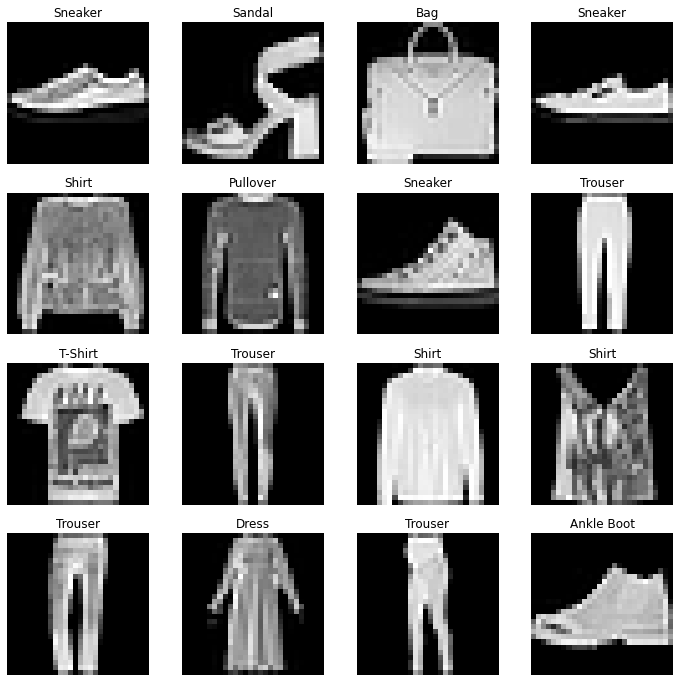

In [ ]:
import matplotlib.pyplot as plt

labels_map = {
    0 : 'T-Shirt',
    1 : 'Trouser',
    2 : 'Pullover',
    3 : 'Dress',
    4 : 'Coat',
    5 : 'Sandal',
    6 : 'Shirt',
    7 : 'Sneaker',
    8 : 'Bag',
    9 : 'Ankle Boot',

}

figure = plt.figure(figsize=(12,12))
cols, rows = 4, 4

# images, labels = next(iter(train_loader))
for i in range(1, cols * rows + 1):
  image = images[i].squeeze()   # 차원 축소
  label_idx = labels[i].item()
  label = labels_map[label_idx]

  figure.add_subplot(rows, cols, i)
  plt.title(label)
  plt.axis('off')
  plt.imshow(image, cmap='gray')

plt.show()

#### 모델 정의 및 파라미터

* Batch Normalization (배치 정규화)\
https://wegonnamakeit.tistory.com/47

 - 각 레이어마다 Normalization 을 하는 레이어를 두어, 변형된 분포가 나오지 않도록 하는 것
 - 미니배치 마다 normalization을 한다는 뜻에서 Batch Normalization 이라고 한다

- nn.Linear (선형 계층)
 - 저장된 가중치와 편향을 사용하여 입력에 선형 변환을 적용하는 모듈

- nn.ReLU (비선형 활성화)
 - 모델의 입력과 출력 사이에 복잡한 관계를 만든다
 - 선형 변환 후에 적용되어 비선형성을 도입하고 신경망이 다양한 현상을 학습할 수 있도록 한다

In [ ]:
from torch import nn
from torch.nn import functional as f

class net(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv2d_32 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1)
    self.conv2d_64 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
    self.max2d     = nn.MaxPool2d(2,2)
    self.conv2d_128 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
    self.conv2d_256 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=2, padding=1)
    self.linear1    = nn.Linear(in_features=3*3*256, out_features=256)
    self.linear2    = nn.Linear(in_features=256, out_features=64)
    self.linear3    = nn.Linear(in_features=64, out_features=10)
    self.batch2d1   = nn.BatchNorm2d(num_features=64)    # 배치 정규화
    self.batch2d2   = nn.BatchNorm2d(num_features=256)
    self.batch1d    = nn.BatchNorm1d(num_features=64)
    self.drop       = nn.Dropout(p=0.3)
    self.flat       = nn.Flatten()

  def forward(self, x):
    x = x.view(-1, 1, 28, 28)
    x = f.relu(self.conv2d_32(x))
    x = f.relu(self.conv2d_64(x))
    x = self.batch2d1(x)
    x = f.relu(self.max2d(x))
    x = self.drop(x)

    x = f.relu(self.conv2d_128(x))
    x = f.relu(self.conv2d_256(x))
    x = self.batch2d2(x)
    x = f.relu(self.max2d(x))
    x = self.drop(x)

    x = self.flat(x)
    x = f.relu(self.linear1(x))
    x = self.drop(x)
    x = f.relu(self.linear2(x))
    x = self.drop(x)
    x = self.batch1d(x)
    x = f.log_softmax(self.linear3(x), dim=1)
    
    return(x)

In [ ]:
net = net()
net

net(
  (conv2d_32): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2d_64): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (max2d): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2d_128): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2d_256): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (linear1): Linear(in_features=2304, out_features=256, bias=True)
  (linear2): Linear(in_features=256, out_features=64, bias=True)
  (linear3): Linear(in_features=64, out_features=10, bias=True)
  (batch2d1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batch2d2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batch1d): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop): Dropout(p=0.3, inplace=False)
  (flat): Flatten(start_dim=1, end_dim=-1)
)

* dilation : kernel 내의 한 픽셀에서 다른 픽셀 간의 거리\
https://gaussian37.github.io/dl-concept-covolution_operation/#dilation-%EC%9D%B4%EB%9E%80-1

 - dilation 을 사용하는 이유는 kernel 이 한번에 넓은 영역을 보고 학습할 수 있게 하기 위함이다

In [ ]:
# net 의 파라미터
params = list(net.parameters())
#print(params[:5])
print(len(params))
print(params[0].size())

20
torch.Size([32, 1, 3, 3])


#### 손실함수와 옵티마이저

In [ ]:
criterion = nn.NLLLoss()   # 손실함수
optimizer = torch.optim.Adam(net.parameters(), lr=0.008)    # 옵티마이저 (adam)

#### 모델 학습

* 배치수 확인

In [ ]:
total_batch = len(train_loader)   # batch_size = 128
print(total_batch)

469


* zero_gard()
 - 보통 딥러닝에서는 미니배치+루프 조합을 사용해서 parameter들을 업데이트하는데,\
 한 루프에서 업데이트를 위해 loss.backward()를 호출하면 각 파라미터들의 '.grad' 값에 변화도가 저장이 된다

 - 이후 다음 루프에서 역전파를 시키면 이전 루프에서 .grad에 저장된 값이 다음 루프의 업데이트에 간섭을 해서 원하는 방향으로 학습이 되지 않는다

 - 따라서 루프가 한번 돌고나서 역전파를 하기전에 반드시 zero_grad()로 '.grad' 값들을 0으로 초기화시킨 후 학습을 진행해야 한다


In [ ]:
for epoch in range(10):
  running_loss = 0.0    # 초기화
  for i, data in enumerate(train_loader, 0):
    inputs, labels = data
    optimizer.zero_grad()   # '.grad' 값들을 0으로 초기화
    outputs = net(inputs)   # 입력값에 모델 적용
    loss = criterion(outputs, labels)    # 손실함수 적용
    loss.backward()    # 역전파 계산
    optimizer.step()   # weight 를 업데이트 하는 시점은 optimizer.step()이 실행되는 시점

    running_loss += loss.item()
    if i % 100 == 99:
      print('Epoch : {}, iter : {}, Loss : {}'.format(epoch+1, i+1, running_loss/2000))
      running_loss = 0.0

Epoch : 1, iter : 100, Loss : 0.025825921878218652
Epoch : 1, iter : 200, Loss : 0.024847980961203574
Epoch : 1, iter : 300, Loss : 0.023239431992173196
Epoch : 1, iter : 400, Loss : 0.02064372795075178
Epoch : 2, iter : 100, Loss : 0.018744146905839445
Epoch : 2, iter : 200, Loss : 0.018967196889221667
Epoch : 2, iter : 300, Loss : 0.018145400270819664
Epoch : 2, iter : 400, Loss : 0.01805217186361551
Epoch : 3, iter : 100, Loss : 0.015996490113437175
Epoch : 3, iter : 200, Loss : 0.01607096017152071
Epoch : 3, iter : 300, Loss : 0.017069820694625377
Epoch : 3, iter : 400, Loss : 0.01589347181469202
Epoch : 4, iter : 100, Loss : 0.014462811812758446
Epoch : 4, iter : 200, Loss : 0.0148464235663414
Epoch : 4, iter : 300, Loss : 0.014710422284901142
Epoch : 4, iter : 400, Loss : 0.014392436735332012
Epoch : 5, iter : 100, Loss : 0.013876517560333014
Epoch : 5, iter : 200, Loss : 0.013996696904301643
Epoch : 5, iter : 300, Loss : 0.0132853418700397
Epoch : 5, iter : 400, Loss : 0.0137025

In [ ]:
PATH = './fashion_mnist.pth'
torch.save(net.state_dict(), PATH)

In [ ]:
# 모델 테스트
import numpy as np

def imshow(image):
  image = image / 2+0.5
  npimg = image.numpy()   # 시각화 하기 위해 넘파이로 변환

  fig = plt.figure(figsize=(16, 8))
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
  plt.show

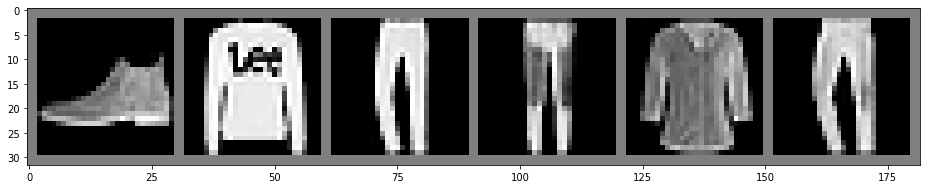

In [ ]:
import torchvision

images, labels = next(iter(test_loader))

imshow(torchvision.utils.make_grid(images[:6]))

In [ ]:
import torch
import torch.nn as nn

data = torch.randn((5, 5))
print(data)
print(torch.max(data, dim=1))    # 가장 높은 확률 출력

tensor([[-0.3392, -0.2231, -0.5514, -0.3692, -0.0277],
        [-0.1337,  0.7018,  0.3078, -1.4857, -2.1204],
        [ 0.4495, -0.7889,  0.8125,  0.5520, -0.3693],
        [ 1.7490,  0.9407, -1.1846,  0.6994, -0.6256],
        [-0.2955, -1.2166, -0.0452, -0.3956,  2.4873]])
torch.return_types.max(
values=tensor([-0.0277,  0.7018,  0.8125,  1.7490,  2.4873]),
indices=tensor([4, 1, 2, 0, 4]))


In [ ]:
outputs = net(images)
print(outputs)

_, predicted = torch.max(outputs, 1)
print(predicted)

tensor([[-2.8903e+01, -2.6366e+01, -3.0555e+01,  ..., -7.1274e+00,
         -3.1587e+01, -8.0315e-04],
        [-1.9056e+01, -1.9505e+01, -4.9113e-05,  ..., -2.4850e+01,
         -2.2548e+01, -2.0234e+01],
        [-1.2129e+01, -4.8626e-04, -1.2585e+01,  ..., -1.3153e+01,
         -1.1743e+01, -1.0030e+01],
        ...,
        [-8.5949e-04, -2.6229e+01, -1.3684e+01,  ..., -2.1078e+01,
         -3.0225e+01, -2.4557e+01],
        [-3.5742e+01, -3.8176e+01, -3.7001e+01,  ..., -2.2207e+01,
          0.0000e+00, -2.0144e+01],
        [-1.7677e+01, -2.3850e+01, -5.0631e+00,  ..., -3.1340e+01,
         -2.5758e+01, -2.8276e+01]], grad_fn=<LogSoftmaxBackward0>)
tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 5, 3, 4, 1, 2, 4, 8, 0, 2, 5, 7, 5,
        1, 2, 6, 6, 9, 3, 8, 8, 3, 3, 8, 0, 7, 5, 7, 9, 6, 1, 3, 9, 6, 7, 2, 1,
        2, 6, 4, 4, 5, 8, 2, 2, 8, 4, 8, 0, 7, 7, 8, 5, 1, 1, 2, 4, 9, 8, 7, 0,
        2, 6, 4, 3, 1, 2, 8, 4, 1, 8, 5, 9, 5, 0, 3, 2, 0, 6, 5, 3, 6, 7, 1, 8,
        0, 1, 2, 

In [ ]:
print(''.join('{}, '.format(labels_map[int(predicted[j].numpy())]) for j in range(6)))

Ankle Boot, Pullover, Trouser, Trouser, Shirt, Trouser, 


In [ ]:
correct = 0
total = 0

with torch.no_grad():
  for data in test_loader:
    images, labels = data
    outputs = net(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
    print(100*correct/total)

91.40625
91.40625
91.40625
91.015625
91.09375
90.88541666666667
91.07142857142857
90.625
90.625
90.46875
90.69602272727273
90.49479166666667
90.68509615384616
90.625
90.57291666666667
90.380859375
90.76286764705883
90.84201388888889
90.83059210526316
90.625
90.51339285714286
90.41193181818181
90.18342391304348
90.13671875
90.3125
90.08413461538461
90.2199074074074
90.01116071428571
90.03232758620689
89.94791666666667
90.02016129032258
90.0634765625
89.96212121212122
90.02757352941177
90.11160714285714
90.16927083333333
90.05489864864865
90.0904605263158
90.14423076923077
90.13671875
90.18673780487805
90.21577380952381
90.22529069767442
90.16335227272727
90.08680555555556
90.1664402173913
90.19281914893617
90.20182291666667
90.21045918367346
90.171875
90.13480392156863
90.14423076923077
90.13856132075472
90.17650462962963
90.21306818181819
90.20647321428571
90.15899122807018
90.26131465517241
90.32044491525424
90.3515625
90.39446721311475
90.38558467741936
90.33978174603175
90.368652343

#### 과제) Fashion MNIST 분류 모델을 keras 로 수행

In [ ]:
from tensorflow.python.framework.tensor_util import fast_tensor_util
import tensorflow as tf

### 1. Fashion MNIST 데이터셋 불러오기
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
### 2. 데이터 전처리 : 0 과 1 사이의 실수로 스케일링
train_images, test_images = train_images / 255.0, test_images / 255.0

In [ ]:
### 3. 모델 구성
def model():
  model = tf.keras.Sequential([
      tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(28, 28, 1)),
      tf.keras.layers.MaxPooling2D(),
      tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu'),
      tf.keras.layers.MaxPooling2D(),
      tf.keras.layers.Conv2D(filters=512, kernel_size=3, activation='relu'),
      tf.keras.layers.MaxPooling2D(),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(units=512, activation='relu'),
      tf.keras.layers.Dropout(0.25),
      tf.keras.layers.Dense(units=64, activation='relu'),
      tf.keras.layers.Dense(units=10)
  ])

  ### 4. 모델 컴파일
  # SparseCategoricalCrossentropy() : 정수로 된 label 을 주면 내부적으로 알아서 loss 를 계산해준다
  model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                optimizer=tf.keras.optimizers.Adam(),
                metrics='accuracy')

  return model

* Cross Entropy 의 종류\
https://peterleeeeee.github.io/categorical_cross_entropy/

In [ ]:
model = model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 256)       73984     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 256)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 512)         1180160   
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 512)        0

In [ ]:
### 4. 모델 훈련
model.fit(train_images, train_labels, epochs=30)

Epoch 1/30
1875/1875 [==============================] - 23s 7ms/step - loss: 0.5289 - accuracy: 0.8055
Epoch 2/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3419 - accuracy: 0.8742
Epoch 3/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2879 - accuracy: 0.8927
Epoch 4/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2541 - accuracy: 0.9050
Epoch 5/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2250 - accuracy: 0.9155
Epoch 6/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2000 - accuracy: 0.9252
Epoch 7/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1768 - accuracy: 0.9328
Epoch 8/30
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1592 - accuracy: 0.9398
Epoch 9/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1425 - accuracy: 0.9463
Epoch 10/30
1875/1875 [==============================] - 14s 7ms/step - lo

In [ ]:
### 5. 정확도 평가하기
loss, accuracy = model.evaluate(test_images, test_labels)
print('loss :', loss)
print('accuracy :', accuracy)

313/313 [==============================] - 1s 4ms/step - loss: 0.6618 - accuracy: 0.8981
loss : 0.6618165373802185 

accuracy : 0.8981000185012817


In [ ]:
### 6. 예측하기
import numpy as np

preds = model.predict(test_images)
print(len(preds))
print(preds[0])
print(np.argmax(preds[0]))

313/313 [==============================] - 1s 3ms/step
10000
[-49.61175  -63.94693  -37.601795 -17.4806   -32.36721    6.246108
 -46.34364   14.318181 -36.144135  42.57254 ]
9
